In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Question: What are the factors affecting the outcome of a play

---

## Setup : Import the Dataset
Years 2020 and 2021 NFL football stats 

In [2]:
yr2020_data = pd.read_csv('pbp-2020.csv')
yr2020_data.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2020122602,2020-12-26,2,9,44,LV,MIA,2,10,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
1,2020122602,2020-12-26,2,9,3,LV,MIA,3,19,73,...,0,0,LEFT GUARD,27,OPP,0,NaN,0,NaN,0
2,2020122500,2020-12-25,3,1,17,MIN,NO,3,9,67,...,0,0,NaN,33,OPP,0,NO,1,DEFENSIVE HOLDING,0
3,2020122500,2020-12-25,3,1,12,MIN,NO,1,10,82,...,0,0,NaN,18,OPP,1,NO,1,DEFENSIVE PASS INTERFERENCE,17
4,2020122500,2020-12-25,3,1,6,MIN,NO,1,1,99,...,0,0,LEFT GUARD,1,OPP,0,NaN,0,NaN,0


In [3]:
yr2020_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          46189 non-null  int64  
 1   GameDate                        46189 non-null  object 
 2   Quarter                         46189 non-null  int64  
 3   Minute                          46189 non-null  int64  
 4   Second                          46189 non-null  int64  
 5   OffenseTeam                     42234 non-null  object 
 6   DefenseTeam                     42234 non-null  object 
 7   Down                            46189 non-null  int64  
 8   ToGo                            46189 non-null  int64  
 9   YardLine                        46189 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 46189 non-null  int64  
 12  Unnamed: 12                     

In [4]:
yr2021_data = pd.read_csv('pbp-2021.csv')
yr2021_data.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2021092612,2021-09-26,1,9,10,MIN,SEA,1,10,57,...,0,0,NaN,43,OPP,0,NaN,0,NaN,0
1,2021092612,2021-09-26,1,8,32,MIN,SEA,1,10,74,...,0,0,NaN,26,OPP,0,NaN,0,NaN,0
2,2021092612,2021-09-26,1,7,52,MIN,SEA,2,2,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
3,2021092612,2021-09-26,1,7,13,MIN,SEA,1,8,92,...,0,0,CENTER,8,OPP,0,NaN,0,NaN,0
4,2021101008,2021-10-10,1,9,50,WAS,NO,2,2,51,...,0,0,LEFT TACKLE,49,OPP,0,NaN,0,NaN,0


In [5]:
yr2021_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          42795 non-null  int64  
 1   GameDate                        42795 non-null  object 
 2   Quarter                         42795 non-null  int64  
 3   Minute                          42795 non-null  int64  
 4   Second                          42795 non-null  int64  
 5   OffenseTeam                     39107 non-null  object 
 6   DefenseTeam                     39107 non-null  object 
 7   Down                            42795 non-null  int64  
 8   ToGo                            42795 non-null  int64  
 9   YardLine                        42795 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 42795 non-null  int64  
 12  Unnamed: 12                     

Joining the two years' dataframes together

In [6]:
nfl = pd.concat([yr2020_data, yr2021_data])
nfl.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2020122602,2020-12-26,2,9,44,LV,MIA,2,10,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
1,2020122602,2020-12-26,2,9,3,LV,MIA,3,19,73,...,0,0,LEFT GUARD,27,OPP,0,NaN,0,NaN,0
2,2020122500,2020-12-25,3,1,17,MIN,NO,3,9,67,...,0,0,NaN,33,OPP,0,NO,1,DEFENSIVE HOLDING,0
3,2020122500,2020-12-25,3,1,12,MIN,NO,1,10,82,...,0,0,NaN,18,OPP,1,NO,1,DEFENSIVE PASS INTERFERENCE,17
4,2020122500,2020-12-25,3,1,6,MIN,NO,1,1,99,...,0,0,LEFT GUARD,1,OPP,0,NaN,0,NaN,0


In [7]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88984 entries, 0 to 42794
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          88984 non-null  int64  
 1   GameDate                        88984 non-null  object 
 2   Quarter                         88984 non-null  int64  
 3   Minute                          88984 non-null  int64  
 4   Second                          88984 non-null  int64  
 5   OffenseTeam                     81341 non-null  object 
 6   DefenseTeam                     81341 non-null  object 
 7   Down                            88984 non-null  int64  
 8   ToGo                            88984 non-null  int64  
 9   YardLine                        88984 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 88984 non-null  int64  
 12  Unnamed: 12                     

## Outcome of plays
isRush (+ve yardage)
isPass (+ve yardage)
isNegativeYards (Sack +subset of rush/pass)

We note that the plays that we want to analyze are within the column 'PlayType', as a string.
We first drop all the missing values from the PlayType column, as it is impossible for us to determine what play it is and hence those rows of data cannot be used

In [8]:
# Drop all rows with no data on the type of play done
nfl.dropna(subset = ['PlayType'], inplace=True)
nfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84900 entries, 0 to 42794
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          84900 non-null  int64  
 1   GameDate                        84900 non-null  object 
 2   Quarter                         84900 non-null  int64  
 3   Minute                          84900 non-null  int64  
 4   Second                          84900 non-null  int64  
 5   OffenseTeam                     81218 non-null  object 
 6   DefenseTeam                     81218 non-null  object 
 7   Down                            84900 non-null  int64  
 8   ToGo                            84900 non-null  int64  
 9   YardLine                        84900 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 84900 non-null  int64  
 12  Unnamed: 12                     

### As the dataset is very large, we will only be focusing on Baltimore's games (noted by team name of BAL) during the 2 years' worth of seasons.

In [9]:
nfl_bal = nfl.copy()
nfl_bal = nfl_bal.loc[(nfl_bal['OffenseTeam'] == 'BAL') | (nfl_bal['DefenseTeam'] == 'BAL')]
nfl_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5082 entries, 27 to 41686
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          5082 non-null   int64  
 1   GameDate                        5082 non-null   object 
 2   Quarter                         5082 non-null   int64  
 3   Minute                          5082 non-null   int64  
 4   Second                          5082 non-null   int64  
 5   OffenseTeam                     5082 non-null   object 
 6   DefenseTeam                     5082 non-null   object 
 7   Down                            5082 non-null   int64  
 8   ToGo                            5082 non-null   int64  
 9   YardLine                        5082 non-null   int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 5082 non-null   int64  
 12  Unnamed: 12                     

In [10]:
print(nfl_bal.columns)

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')


All interceptions will have negative yards as possession is changed over. We reformat this as we want the 'Yards' value to be in the perspective of the offense team

In [11]:
nfl_bal.loc[nfl_bal['IsInterception'] == 1, ['Yards']] *= -1

All YardLine values of 100 were found to have been recorded wrongly and be actually 50. As such, we change the values in the dataframe accordingly

In [12]:
nfl_bal.loc[nfl_bal['YardLine'] == 100, ['YardLine']] = 50

All rows where IsPenalty values are 1 do not have any 'Yards' value, and the respective play after the penalty reflects the correct 'Yards' value. As such, these rows do not contribute towards our dataset as well.

In [13]:
nfl_bal.drop(nfl_bal[nfl_bal['IsPenalty'] == 1].index, inplace = True)
nfl_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 27 to 41686
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          4626 non-null   int64  
 1   GameDate                        4626 non-null   object 
 2   Quarter                         4626 non-null   int64  
 3   Minute                          4626 non-null   int64  
 4   Second                          4626 non-null   int64  
 5   OffenseTeam                     4626 non-null   object 
 6   DefenseTeam                     4626 non-null   object 
 7   Down                            4626 non-null   int64  
 8   ToGo                            4626 non-null   int64  
 9   YardLine                        4626 non-null   int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 4626 non-null   int64  
 12  Unnamed: 12                     

We fill in all the missing values for the following columns with 'NA', since they should not have any value.

In [14]:
nfl_bal["PassType"].fillna("NA", inplace = True)
nfl_bal["RushDirection"].fillna("NA", inplace = True)
nfl_bal["PenaltyTeam"].fillna("NA", inplace = True)
nfl_bal["PenaltyType"].fillna("NA", inplace = True)

In [15]:
nfl_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 27 to 41686
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          4626 non-null   int64  
 1   GameDate                        4626 non-null   object 
 2   Quarter                         4626 non-null   int64  
 3   Minute                          4626 non-null   int64  
 4   Second                          4626 non-null   int64  
 5   OffenseTeam                     4626 non-null   object 
 6   DefenseTeam                     4626 non-null   object 
 7   Down                            4626 non-null   int64  
 8   ToGo                            4626 non-null   int64  
 9   YardLine                        4626 non-null   int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 4626 non-null   int64  
 12  Unnamed: 12                     

In [16]:
print(nfl_bal.columns)

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')


Finally, we drop all the columns that are not needed, as they either overlap with columns we want or are unrelated to our problem. The 'isIncomplete' column is also a subset of 'isPass' and hence we do not need it.

In [17]:
nfl_bal.drop(['IsIncomplete','Challenger', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'IsChallenge', 'IsChallengeReversed', 'IsMeasurement', 'IsInterception', 'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'YardLineFixed', 'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType', 'PenaltyYards'], axis=1, inplace=True)
print(nfl_bal.columns)

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown',
       'NextScore', 'Description', 'TeamWin', 'SeasonYear', 'Yards',
       'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsTouchdown', 'PassType',
       'IsSack', 'RushDirection'],
      dtype='object')


In [18]:
nfl_bal.reset_index(drop=True, inplace=True)
display(nfl_bal)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsTouchdown,PassType,IsSack,RushDirection
0,2020122705,2020-12-27,2,1,11,NYG,BAL,4,6,87,...,2020,0,FIELD GOAL,FIELD GOAL,0,0,0,NA,0,NA
1,2020122705,2020-12-27,2,0,45,BAL,NYG,1,10,57,...,2020,6,SHOTGUN,PASS,0,1,0,SHORT RIGHT,0,NA
2,2020122705,2020-12-27,2,0,34,BAL,NYG,3,4,63,...,2020,7,SHOTGUN,RUSH,1,0,0,NA,0,RIGHT GUARD
3,2020122705,2020-12-27,4,4,18,BAL,NYG,2,10,85,...,2020,7,SHOTGUN,PASS,0,1,0,SHORT RIGHT,0,NA
4,2020122705,2020-12-27,4,3,29,BAL,NYG,3,3,92,...,2020,7,SHOTGUN,RUSH,1,0,0,NA,0,RIGHT GUARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,2021091300,2021-09-13,2,1,12,LV,BAL,1,10,36,...,2021,0,SHOTGUN,PASS,0,1,0,DEEP RIGHT,0,NA
4622,2021091300,2021-09-13,2,1,13,BAL,LV,4,1,64,...,2021,0,SHOTGUN,RUSH,1,0,0,NA,0,LEFT GUARD
4623,2021091300,2021-09-13,2,1,22,BAL,LV,3,3,62,...,2021,2,SHOTGUN,RUSH,1,0,0,NA,0,LEFT GUARD
4624,2021091300,2021-09-13,2,2,0,BAL,LV,2,7,58,...,2021,4,SHOTGUN,PASS,0,1,0,SHORT MIDDLE,0,NA


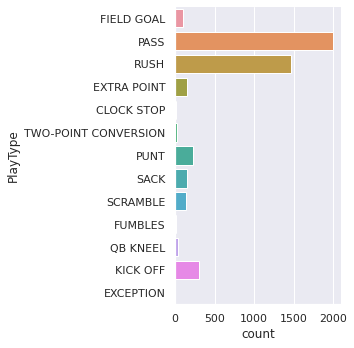

In [19]:
sb.catplot(y = 'PlayType', data = nfl_bal, kind = "count")

Renaming the rows with SACK to PASS as they are essentially the same. A sack occurs when a pass play is intercepted by the opposing team

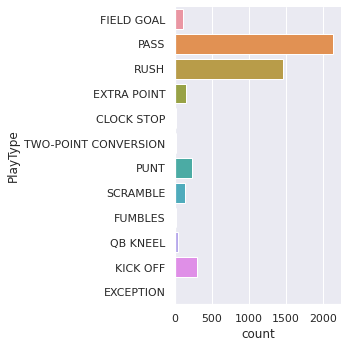

In [20]:
nfl_bal.loc[nfl_bal["PlayType"] == "SACK", "PlayType"] = "PASS"
sb.catplot(y = 'PlayType', data = nfl_bal, kind = "count")


<AxesSubplot:xlabel='PlayType', ylabel='Yards'>

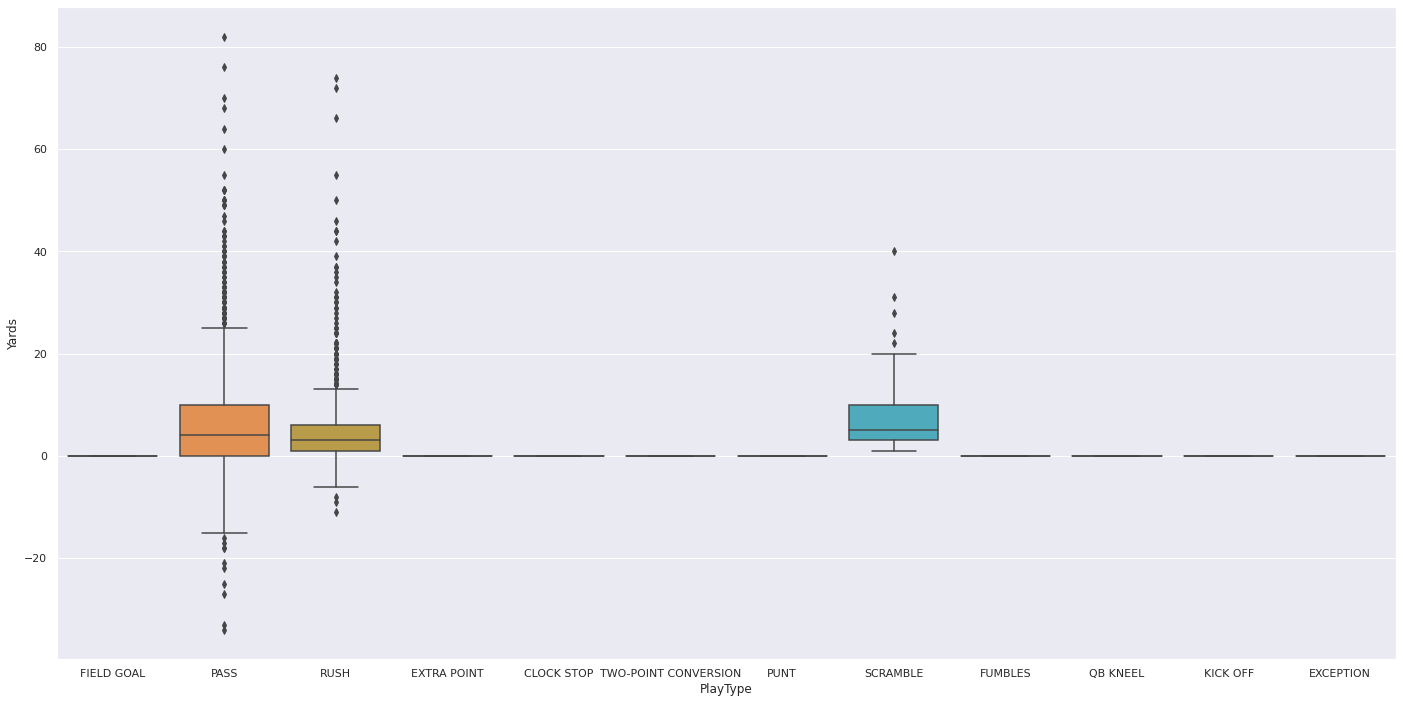

In [21]:
f, axes = plt.subplots(1, 1, figsize=(24,12))
sb.boxplot(x=nfl_bal['PlayType'], y=nfl_bal['Yards'], ax=axes)

#### Playtype will be reduced to Pass,Rush and Scramble from hereforth
 Only passing, rushing and scrambling plays contribute to changes in yardage

Drop rows with PlayType of PENALTY, EXCEPTION, FIELD GOAL, QB KNEEL, TWO-POINT CONVERSION, NO PLAY, PUNT, EXTRA POINT, FUMBLES, KICK OFF, or CLOCK STOP as the counts of these outcomes are insignificant or do not affect yardage

In [22]:
# Drop all rows in PlayType except PASS, RUSH and SCRAMBLE as the counts of other outcomes are insignificant, and inconclusive
nfl_bal.drop(nfl_bal[(nfl_bal['PlayType'] == 'EXCEPTION') | (nfl_bal['PlayType'] == 'CLOCK STOP') | (nfl_bal['PlayType'] == 'TWO-POINT CONVERSION') | (nfl_bal['PlayType'] == 'EXTRA POINT') | (nfl_bal['PlayType'] == 'QB KNEEL') 
| (nfl_bal['PlayType'] == 'FIELD GOAL') | (nfl_bal['PlayType'] == 'PUNT') | (nfl_bal['PlayType'] == 'FUMBLES') | (nfl_bal['PlayType'] == 'KICK OFF')].index, axis=0, inplace=True)

In [23]:
nfl_bal.reset_index(drop=True, inplace=True)
nfl_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GameId           3750 non-null   int64 
 1   GameDate         3750 non-null   object
 2   Quarter          3750 non-null   int64 
 3   Minute           3750 non-null   int64 
 4   Second           3750 non-null   int64 
 5   OffenseTeam      3750 non-null   object
 6   DefenseTeam      3750 non-null   object
 7   Down             3750 non-null   int64 
 8   ToGo             3750 non-null   int64 
 9   YardLine         3750 non-null   int64 
 10  SeriesFirstDown  3750 non-null   int64 
 11  NextScore        3750 non-null   int64 
 12  Description      3750 non-null   object
 13  TeamWin          3750 non-null   int64 
 14  SeasonYear       3750 non-null   int64 
 15  Yards            3750 non-null   int64 
 16  Formation        3750 non-null   object
 17  PlayType         3750 non-null   

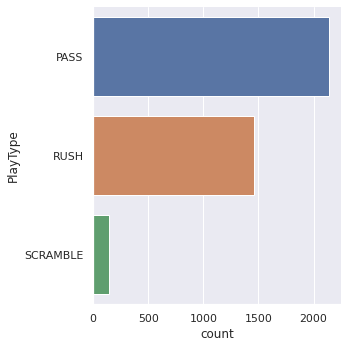

In [24]:
sb.catplot(y = 'PlayType', data = nfl_bal, kind = "count")

---
## Exploratory Data Analysis



#### Time v Yards
#### Down v Yards
#### YardLine v Yards
#### Formation v Yards
#### Count of Pass and Rush Types
#### Down v PlayType & Down v ToGo
#### YardLine v PlayType
#### YardLine v CombinedPlayType

In [25]:
## Formating the time into minutes only, independent of which quarter of the game it is at

nfl_bal['Time'] = 0
for i in range(len(nfl_bal)):
    nfl_bal.loc[nfl_bal.index[i], 'Time'] = nfl_bal.loc[nfl_bal.index[i], 'Minute'] + 15*(nfl_bal.loc[nfl_bal.index[i], 'Quarter']-1)

In [26]:
display(nfl_bal)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,Yards,Formation,PlayType,IsRush,IsPass,IsTouchdown,PassType,IsSack,RushDirection,Time
0,2020122705,2020-12-27,2,0,45,BAL,NYG,1,10,57,...,6,SHOTGUN,PASS,0,1,0,SHORT RIGHT,0,NA,15
1,2020122705,2020-12-27,2,0,34,BAL,NYG,3,4,63,...,7,SHOTGUN,RUSH,1,0,0,NA,0,RIGHT GUARD,15
2,2020122705,2020-12-27,4,4,18,BAL,NYG,2,10,85,...,7,SHOTGUN,PASS,0,1,0,SHORT RIGHT,0,NA,49
3,2020122705,2020-12-27,4,3,29,BAL,NYG,3,3,92,...,7,SHOTGUN,RUSH,1,0,0,NA,0,RIGHT GUARD,48
4,2021010303,2021-01-03,2,2,0,CIN,BAL,1,10,71,...,1,SHOTGUN,RUSH,1,0,0,NA,0,LEFT GUARD,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2021091300,2021-09-13,2,1,12,LV,BAL,1,10,36,...,0,SHOTGUN,PASS,0,1,0,DEEP RIGHT,0,NA,16
3746,2021091300,2021-09-13,2,1,13,BAL,LV,4,1,64,...,0,SHOTGUN,RUSH,1,0,0,NA,0,LEFT GUARD,16
3747,2021091300,2021-09-13,2,1,22,BAL,LV,3,3,62,...,2,SHOTGUN,RUSH,1,0,0,NA,0,LEFT GUARD,16
3748,2021091300,2021-09-13,2,2,0,BAL,LV,2,7,58,...,4,SHOTGUN,PASS,0,1,0,SHORT MIDDLE,0,NA,17


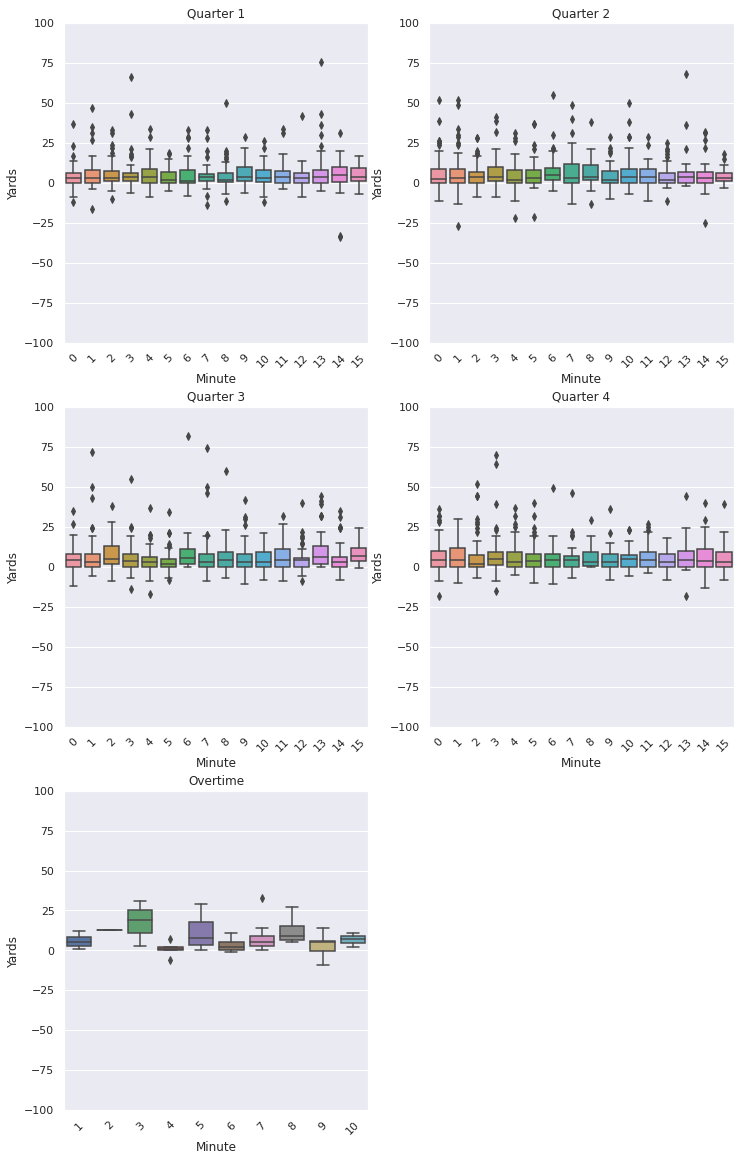

In [27]:
# Time vs Yards
f, axes = plt.subplots(3, 2, figsize=(12,20))
df = {}
target_column = ['Minute', 'Yards']
for i in range(1,6):
    df[i] = nfl_bal.loc[nfl_bal['Quarter'] == i, target_column]
q1 = sb.boxplot(x = 'Minute', y = 'Yards', data = df[1], ax=axes[0,0]).set_title('Quarter 1')
sb.boxplot(x = 'Minute', y = 'Yards', data = df[2], ax=axes[0,1]).set_title('Quarter 2')
sb.boxplot(x = 'Minute', y = 'Yards', data = df[3], ax=axes[1,0]).set_title('Quarter 3')
sb.boxplot(x = 'Minute', y = 'Yards', data = df[4], ax=axes[1,1]).set_title('Quarter 4')
sb.boxplot(x = 'Minute', y = 'Yards', data = df[5], ax=axes[2,0]).set_title('Overtime')
# Representing the time data as minutes and plotting across the different quarters of the game

axes[0,0].set_ylim(-100,100)
plt.setp(axes[0,0].get_xticklabels(), rotation=45)
axes[0,1].set_ylim(-100,100)
plt.setp(axes[0,1].get_xticklabels(), rotation=45)
axes[1,0].set_ylim(-100,100)
plt.setp(axes[1,0].get_xticklabels(), rotation=45)
axes[1,1].set_ylim(-100,100)
plt.setp(axes[1,1].get_xticklabels(), rotation=45)
axes[2,0].set_ylim(-100,100)
plt.setp(axes[2,0].get_xticklabels(), rotation=45)
axes[2,1].set_axis_off()

#### In general, more yards were covered with less time left on the clock
#### 5th Quarter had a larger Q1-Q3 and fewer anomalies, as games seldom stretch to this quarter

<AxesSubplot:xlabel='Down', ylabel='Yards'>

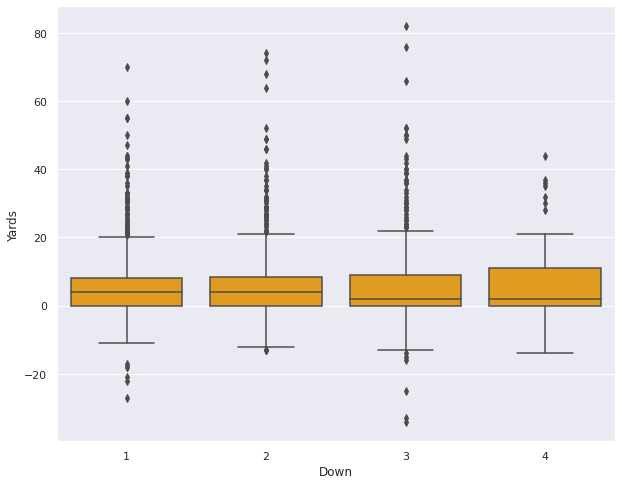

In [28]:
# Down vs Yards
f, axes = plt.subplots(1, 1, figsize=(10,8))
sb.boxplot(x = 'Down', y = 'Yards', data = nfl_bal, color="orange")

#### The number of yards travelled is consistent, with Q1-Q3 of data around 0-10 yards

#### There are some outliers greater than 20, as teams do exceptionally well and some that are less than 0, because those are when there is negative yardage due to a penalty

<AxesSubplot:xlabel='YardLine', ylabel='Yards'>

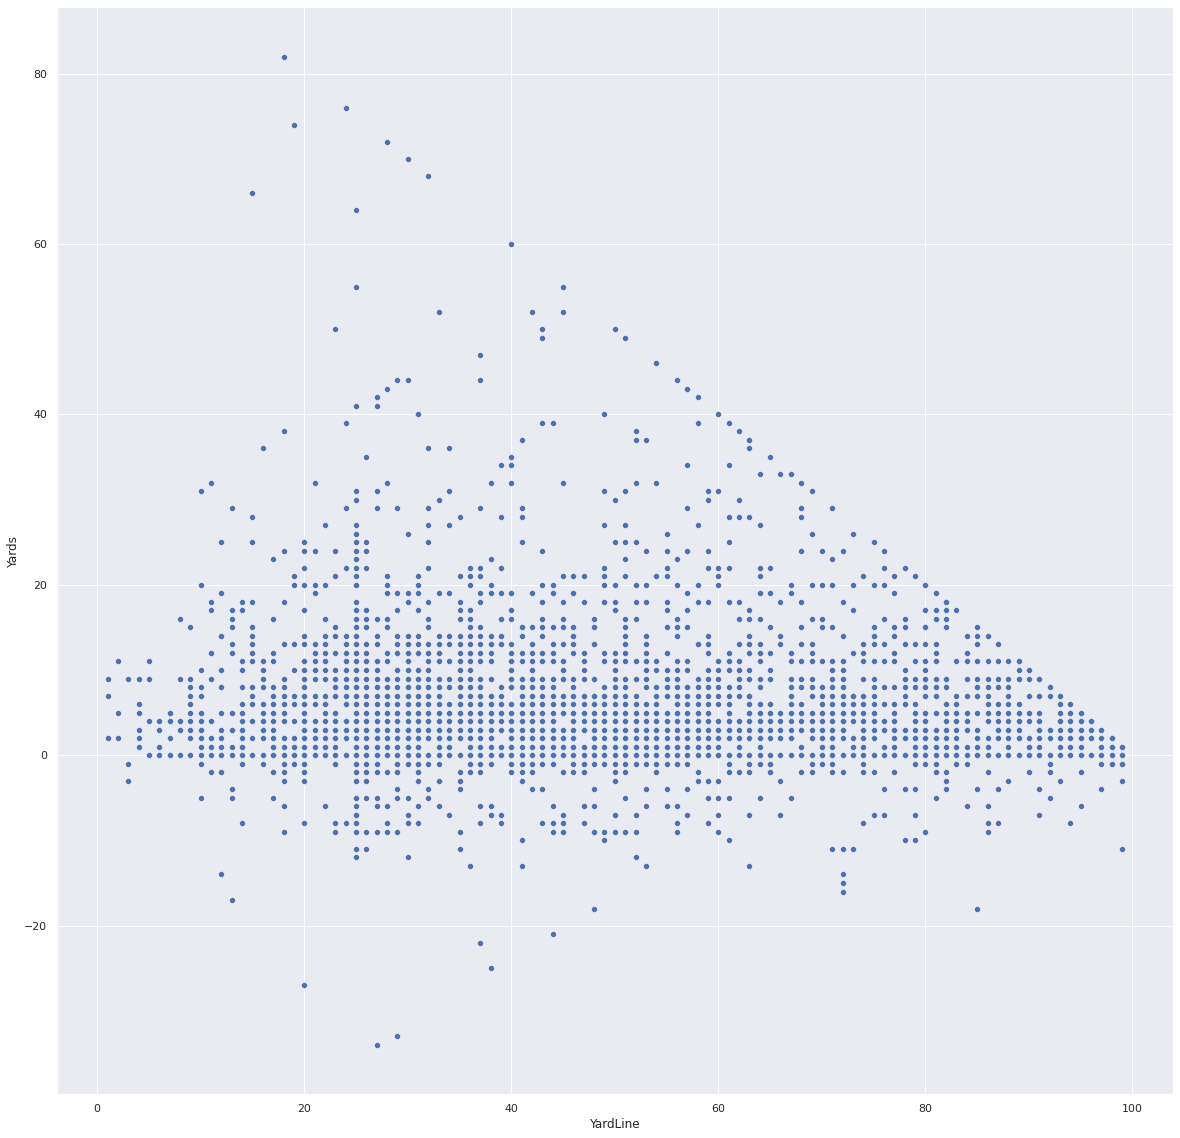

In [29]:
#YardLine v Yards
f, axes = plt.subplots(1, 1, figsize=(20,20))
sb.scatterplot(x = 'YardLine', y = 'Yards', data = nfl_bal, ax=axes)

#### Maximum length of field is 100. Maximum value of Yardline + Yards = 100. 
#### Majority of plays have yardage that are between 0 - 20 yards

<AxesSubplot:xlabel='Formation', ylabel='Yards'>

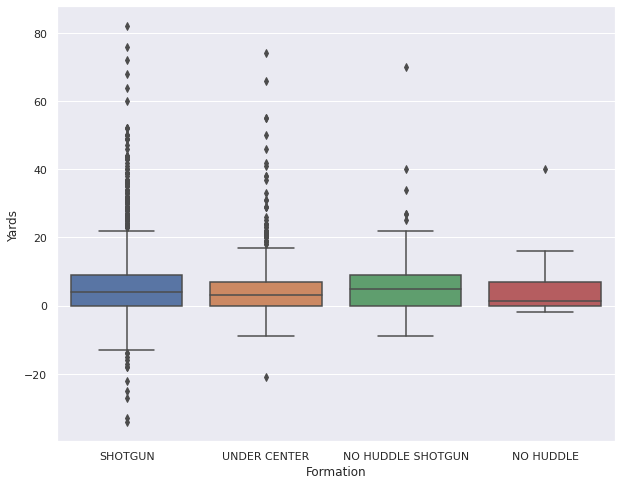

In [30]:
#Formation vs Yards
f, axes = plt.subplots(1, 1, figsize=(10,8))

#sb.stripplot(x = 'Formation', y = 'Yards', data = nfl_bal, ax=axes, color = 'gray')
sb.boxplot(x = 'Formation', y = 'Yards', data = nfl_bal, ax=axes)

#### Q1-Q3 of yards for each formation type is around the same 
#### Range of yards for shotgun type formations (shotgun, no huddle shotgun) is larger

<AxesSubplot:xlabel='RushDirection', ylabel='count'>

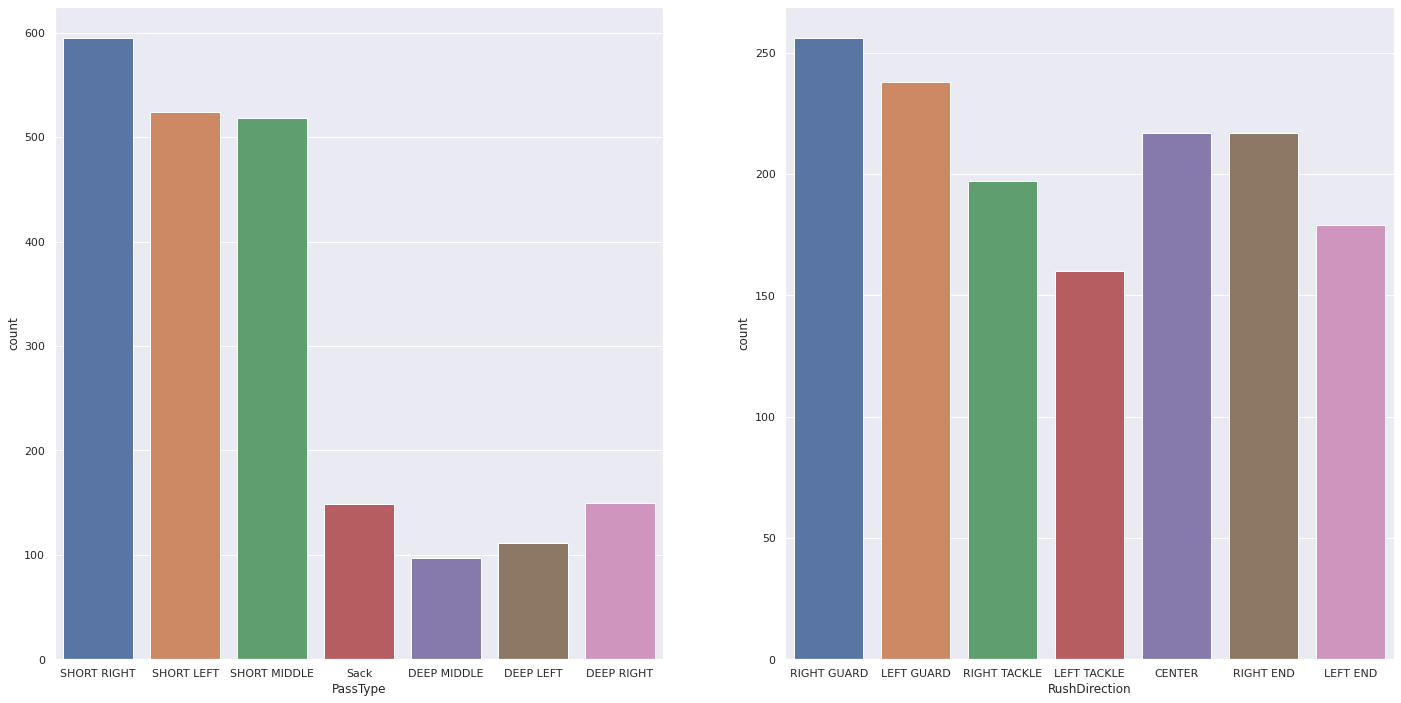

In [31]:
# Bar Plots of Pass and Rush types that constitute a play
for i in range(len(nfl_bal)) :
    if nfl_bal.loc[nfl_bal.index[i], "PassType"] == 'NA':
        nfl_bal.loc[nfl_bal.index[i], "PassType"] = 'Sack'

f, axes = plt.subplots(1, 2, figsize=(24,12))
sb.countplot(x = 'PassType', data = nfl_bal.loc[nfl_bal['PlayType'] == 'PASS'], ax=axes[0])
sb.countplot(x = 'RushDirection', data = nfl_bal.loc[nfl_bal['PlayType'] == 'RUSH'], ax=axes[1])

#### Short pass types are widely favoured over the deep pass types

#### Rush Types generally do not vary much, but the left and right guard rush directions are the most popular, while the left tackle is the least popular



<AxesSubplot:xlabel='Down', ylabel='ToGo'>

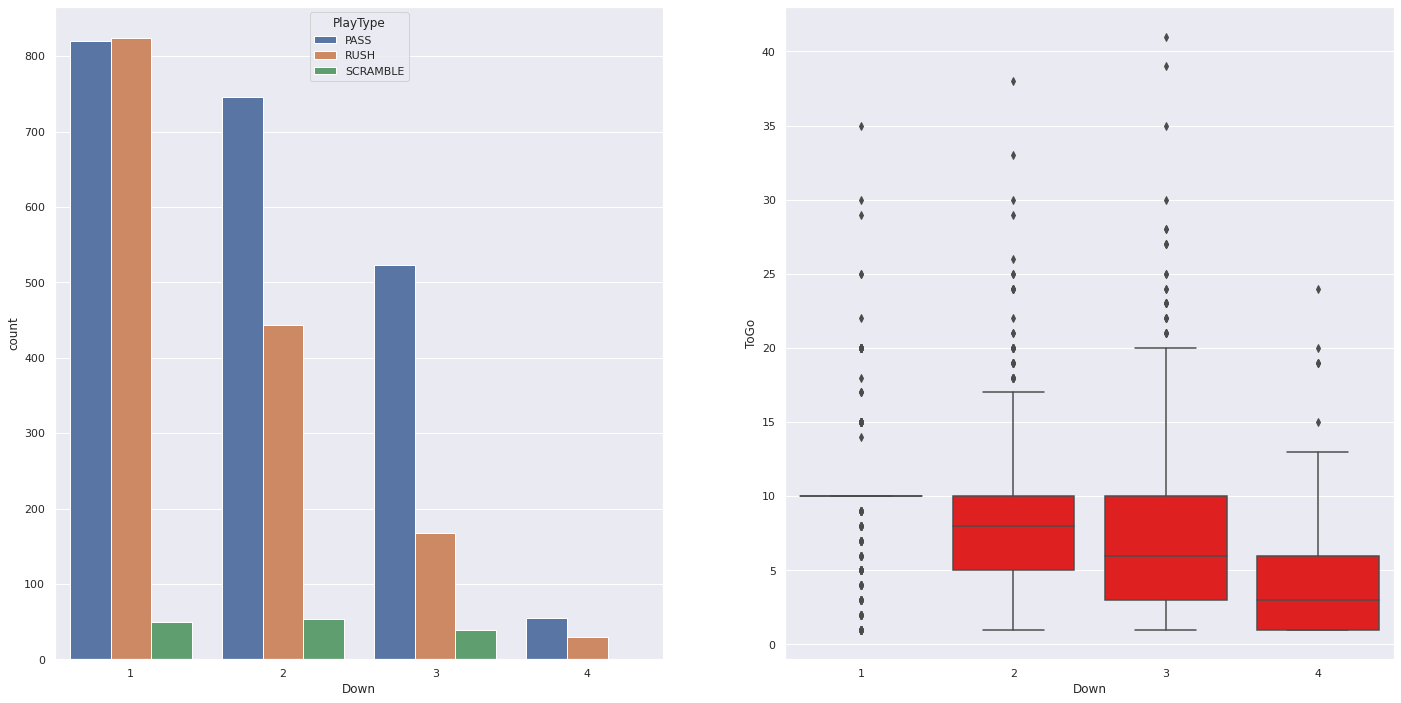

In [32]:
#Down vs PlayType and Down vs ToGo
f, axes = plt.subplots(1, 2, figsize=(24,12))
sb.countplot(x = 'Down', hue = 'PlayType', data = nfl_bal, ax=axes[0])
sb.boxplot(x = 'Down', y = 'ToGo', data = nfl_bal, color="red", ax=axes[1])

#### It appears that pass plays are generally favoured across all downs, as compared to other plays. Due to the fact that the "yards to go" is most commonly 10 on the <font color="red">first down</font>, the variety of plays is much larger, therefore the number of rush plays is comparable to the number of pass plays.
#### In general, <font color="red">scramble plays</font> are not favoured, as they are unplanned strategies used at the discretion of the quarterback.

#### Median of ToGo decreases as the number of downs increases, the range and the quartiles generally decrease. However, IQR and Q1-Q3 and span of anomalies increased.

#### 1st Down's IQR is 0, with median at 10 ToGo because that is the distance that teams start with normally.

<AxesSubplot:xlabel='YardLine', ylabel='PlayType'>

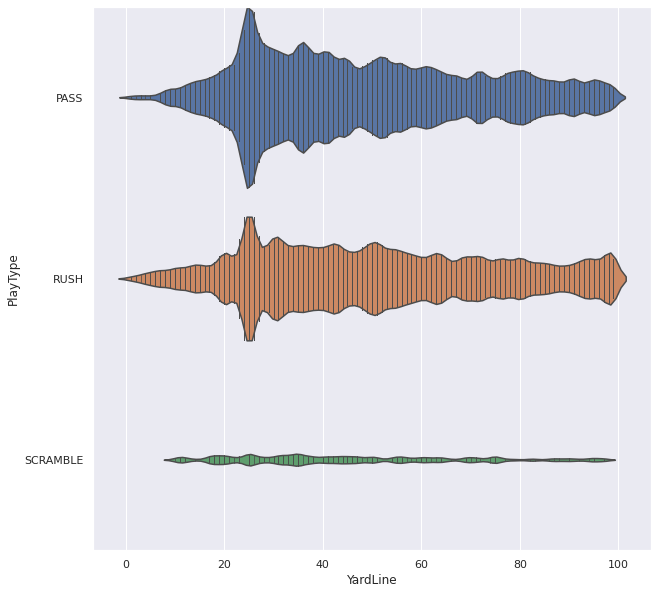

In [33]:
# YardLine vs PlayType
f, axes = plt.subplots(1, 1, figsize=(10,10))
sb.violinplot(x = 'YardLine', y = 'PlayType', data = nfl_bal, ax=axes, scale = 'count',inner="stick", scale_hue=False,width =1,bw=.05)

#### Passing and rushing plays are more numerous than scrambles. Generally, the number of pass plays decrease closer to the endzone(100 YardLine). There is a sharp increase in the number of rushing plays near the endzone.

##### Due to the different types of Rush and Pass plays, for better visualisation, they will be combined into a categorical column: CombinedPlayType

In [34]:
playtype = nfl_bal['PassType'].tolist()
nfl_bal['CombinedPlayType'] = playtype

for i in range(len(nfl_bal)) :
    if nfl_bal.loc[nfl_bal.index[i], "RushDirection"] != 'NA':
        nfl_bal.loc[nfl_bal.index[i], "CombinedPlayType"] = "(RUSH) " + nfl_bal.loc[nfl_bal.index[i], "RushDirection"]
    elif nfl_bal.loc[nfl_bal.index[i], "PassType"] != 'NA':
        nfl_bal.loc[nfl_bal.index[i], "CombinedPlayType"] = "(PASS) " + nfl_bal.loc[nfl_bal.index[i], "PassType"]
    elif nfl_bal.loc[nfl_bal.index[i], "PassType"] == 'NA':
        nfl_bal.loc[nfl_bal.index[i], "CombinedPlayType"] = "SACK"

In [35]:
playtypes = []
for playtype in nfl_bal["CombinedPlayType"]:
    if playtype not in playtypes:
        playtypes.append(playtype)
playtypes.sort()
print(playtypes)

['(PASS) DEEP LEFT', '(PASS) DEEP MIDDLE', '(PASS) DEEP RIGHT', '(PASS) SHORT LEFT', '(PASS) SHORT MIDDLE', '(PASS) SHORT RIGHT', '(PASS) Sack', '(RUSH) CENTER', '(RUSH) LEFT END', '(RUSH) LEFT GUARD', '(RUSH) LEFT TACKLE', '(RUSH) RIGHT END', '(RUSH) RIGHT GUARD', '(RUSH) RIGHT TACKLE']


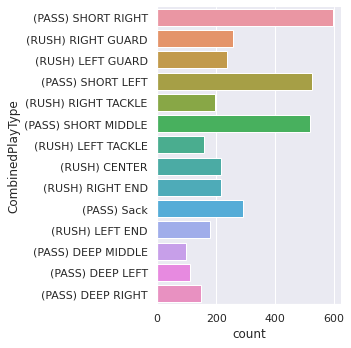

In [36]:
sb.catplot(y = 'CombinedPlayType', data = nfl_bal, kind = "count")

<AxesSubplot:xlabel='YardLine', ylabel='CombinedPlayType'>

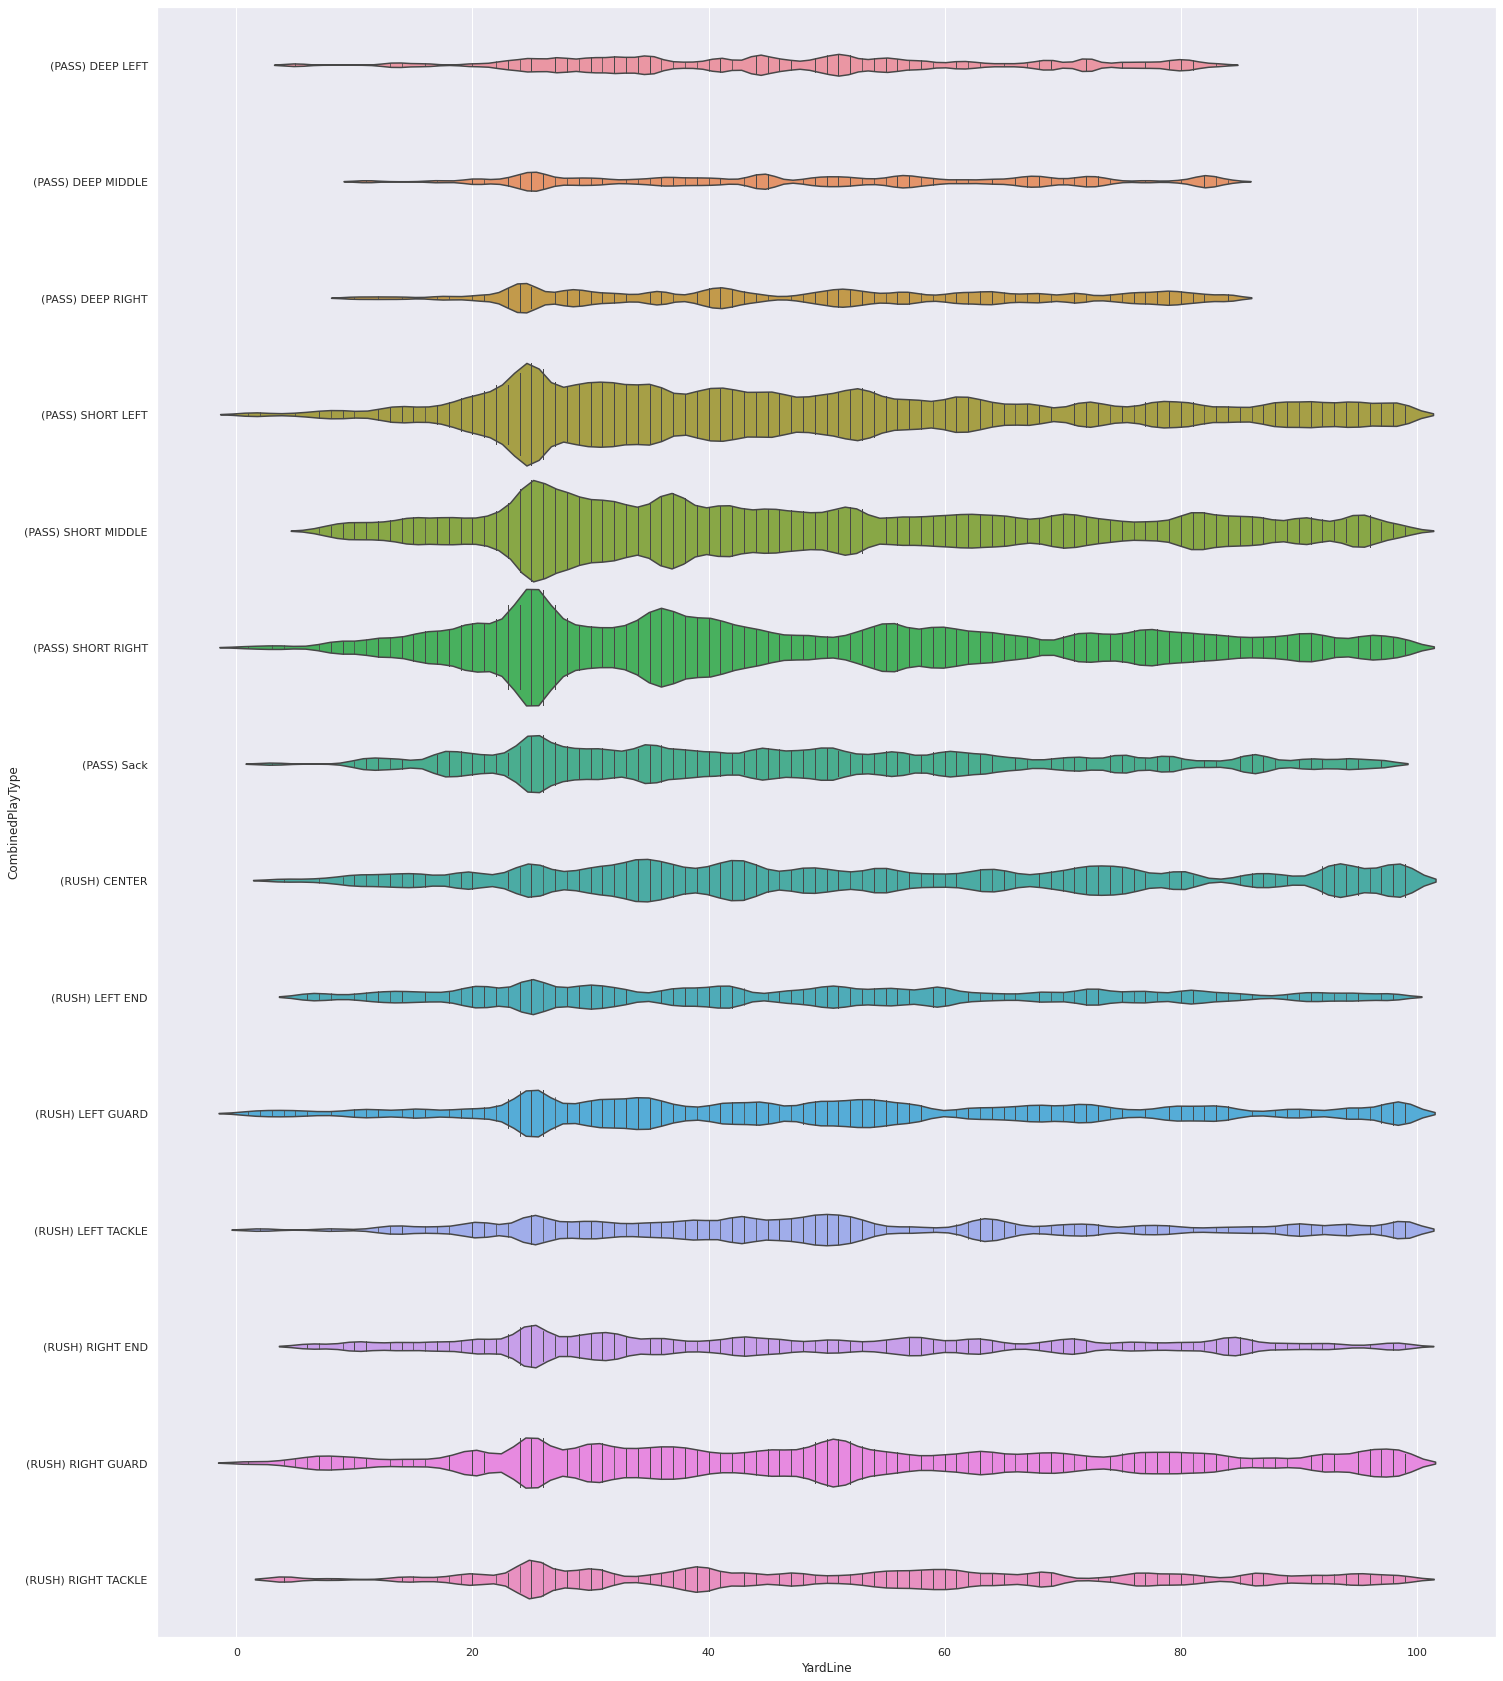

In [37]:
# YardLine vs CombinedPlayType
f, axes = plt.subplots(1, 1, figsize=(24,30))
sb.violinplot(x = 'YardLine', y = 'CombinedPlayType', data = nfl_bal, ax=axes, scale = 'count',inner="stick", scale_hue=False,width =1,bw=.05, order=playtypes)

#### When closer to the 100 yard line (end goal), only <font color="red">short passes</font> are done, which is consistent with the game

#### Most plays are done around the 20th - 40th yard line

#### Deep passes generally do not occur close to the 0 yard line, because there is a risk of a Safety occuring, near the opponent's end zone

## Machine Learning
##### Using models such as <font color="blue">Random forest and XGBoost</font> to seeing how the different types of play (rush direction, passtype, fumble affects the success via yardage gained), and to check the consistency of the observed variables with high relevance against the 2 models

### Categorical data 

##### Changing the yards gained from each play from <font color="red">numerical data into a categorical data</font>  by segmenting into 3 different categories so that the results can be easily analysed.

<AxesSubplot:xlabel='Success', ylabel='count'>

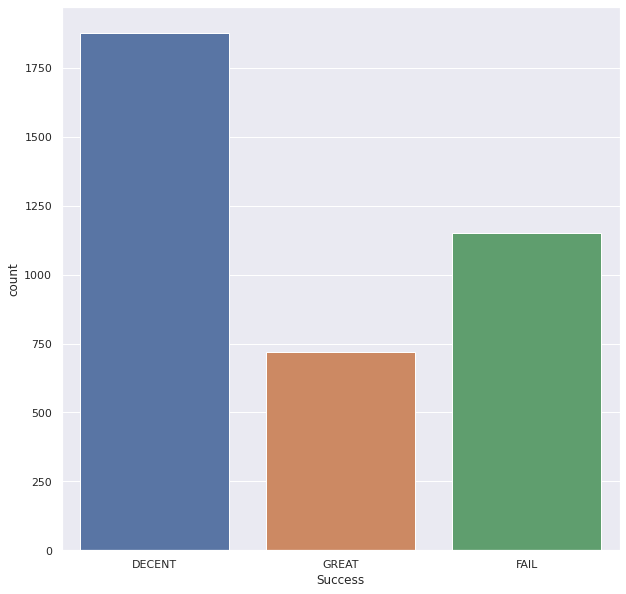

In [38]:
#Splitting Yards into different levels 
playtype = nfl_bal['PassType'].tolist()
nfl_bal['Success'] = playtype

for i in range(len(nfl_bal)) :
    if nfl_bal.loc[nfl_bal.index[i],"Yards"] <= 0:
        nfl_bal.loc[nfl_bal.index[i],"Success"] = "FAIL"
    elif nfl_bal.loc[nfl_bal.index[i],"Yards"] <= 10:
        nfl_bal.loc[nfl_bal.index[i],"Success"] = "DECENT"
    elif nfl_bal.loc[nfl_bal.index[i],"Yards"] > 10:
        nfl_bal.loc[nfl_bal.index[i],"Success"] = "GREAT"


f, axes = plt.subplots(1, 1, figsize=(10,10))
sb.countplot(x = 'Success', data = nfl_bal, ax=axes)

#### There is a large class imbalance that can be observed. For now, we will put the data as it is into the classification model

In [39]:
#creating a copy
nfl_bal_copy = nfl_bal.copy(deep = True)
# Putting feature variable to X
nfl_bal_copy.drop(['SeriesFirstDown','Yards', 'GameId', 'GameDate', 'OffenseTeam', 'DefenseTeam', 'NextScore', 'Description', 'TeamWin','SeasonYear','PlayType','IsRush', 'IsPass', 'IsTouchdown', 'IsSack','PassType','RushDirection','Minute','Second'],axis=1, inplace=True)
nfl_bal_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Quarter           3750 non-null   int64 
 1   Down              3750 non-null   int64 
 2   ToGo              3750 non-null   int64 
 3   YardLine          3750 non-null   int64 
 4   Formation         3750 non-null   object
 5   Time              3750 non-null   int64 
 6   CombinedPlayType  3750 non-null   object
 7   Success           3750 non-null   object
dtypes: int64(5), object(3)
memory usage: 234.5+ KB


#### To prepare data for machine learning models, all data type string converted to int data type via OneHotEncoder

In [40]:
# One-hot encoding for CombinedPlayType and Formation
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

nfl_bal_cat = nfl_bal_copy[['CombinedPlayType', 'Formation']]
ohe.fit(nfl_bal_cat)
nfl_bal_cat_ohe = pd.DataFrame(ohe.transform(nfl_bal_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(nfl_bal_cat.columns))

# Check the encoded variables
nfl_bal_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CombinedPlayType_(PASS) DEEP LEFT     3750 non-null   float64
 1   CombinedPlayType_(PASS) DEEP MIDDLE   3750 non-null   float64
 2   CombinedPlayType_(PASS) DEEP RIGHT    3750 non-null   float64
 3   CombinedPlayType_(PASS) SHORT LEFT    3750 non-null   float64
 4   CombinedPlayType_(PASS) SHORT MIDDLE  3750 non-null   float64
 5   CombinedPlayType_(PASS) SHORT RIGHT   3750 non-null   float64
 6   CombinedPlayType_(PASS) Sack          3750 non-null   float64
 7   CombinedPlayType_(RUSH) CENTER        3750 non-null   float64
 8   CombinedPlayType_(RUSH) LEFT END      3750 non-null   float64
 9   CombinedPlayType_(RUSH) LEFT GUARD    3750 non-null   float64
 10  CombinedPlayType_(RUSH) LEFT TACKLE   3750 non-null   float64
 11  CombinedPlayType_

In [41]:
nfl_bal_ohe = pd.concat([nfl_bal_copy, nfl_bal_cat_ohe], 
                           sort = False, axis = 1).reindex(index=nfl_bal_copy.index)
# Drop the columns that have been one-hot encoded
nfl_bal_ohe.drop(['CombinedPlayType', 'Formation'], axis=1, inplace=True)
# Check the final concatenated dataframe
nfl_bal_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Quarter                               3750 non-null   int64  
 1   Down                                  3750 non-null   int64  
 2   ToGo                                  3750 non-null   int64  
 3   YardLine                              3750 non-null   int64  
 4   Time                                  3750 non-null   int64  
 5   Success                               3750 non-null   object 
 6   CombinedPlayType_(PASS) DEEP LEFT     3750 non-null   float64
 7   CombinedPlayType_(PASS) DEEP MIDDLE   3750 non-null   float64
 8   CombinedPlayType_(PASS) DEEP RIGHT    3750 non-null   float64
 9   CombinedPlayType_(PASS) SHORT LEFT    3750 non-null   float64
 10  CombinedPlayType_(PASS) SHORT MIDDLE  3750 non-null   float64
 11  CombinedPlayType_

#### Splitting data randomly into test and train sets (train set size = 0.7 of total data)

In [42]:
# Random Forest
# Putting response variable to y
y = nfl_bal_ohe['Success']
X = nfl_bal_ohe
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
# Dropping the response variable from the train and test sets
X_train.drop(['Success'], axis=1, inplace=True)
X_test.drop(['Success'], axis=1, inplace=True)
X_train.shape, X_test.shape

((2625, 23), (1125, 23))

#### Using grid search to determine the best parameters to set for RandomForest

In [43]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

# checking the oob score, best is slightly less than 1%
print("oob score:", classifier_rf.oob_score_)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'max_features' : [3,5,18,23],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)
grid_search.best_score_
rf_best_train = grid_search.best_estimator_
rf_best_train

oob score: 0.5554285714285714
Fitting 4 folds for each of 720 candidates, totalling 2880 fits


RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)

In [44]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 5,
 'n_estimators': 100}

#### Applying recommended parameters from gridsearch onto the RandomForest

[Text(0.7766183035714286, 0.9545454545454546, 'CombinedPlayType_(RUSH) RIGHT END <= 0.5\ngini = 0.615\nsamples = 1685\nvalue = [1323, 817, 485]\nclass = Decent'),
 Text(0.6425223214285715, 0.8636363636363636, 'Success <= 0.5\ngini = 0.624\nsamples = 1573\nvalue = [1184, 798, 471]\nclass = Decent'),
 Text(0.5564732142857143, 0.7727272727272727, 'YardLine <= 86.5\ngini = 0.617\nsamples = 1527\nvalue = [1184, 757, 440]\nclass = Decent'),
 Text(0.4700892857142857, 0.6818181818181818, 'CombinedPlayType_(PASS) SHORT LEFT <= 0.5\ngini = 0.628\nsamples = 1394\nvalue = [1036, 685, 438]\nclass = Decent'),
 Text(0.3830357142857143, 0.5909090909090909, 'CombinedPlayType_(PASS) DEEP MIDDLE <= 0.5\ngini = 0.616\nsamples = 1187\nvalue = [923, 575, 339]\nclass = Decent'),
 Text(0.2517857142857143, 0.5, 'CombinedPlayType_(RUSH) LEFT TACKLE <= 0.5\ngini = 0.601\nsamples = 1122\nvalue = [923, 515, 304]\nclass = Decent'),
 Text(0.15357142857142858, 0.4090909090909091, 'CombinedPlayType_(RUSH) RIGHT GUARD 

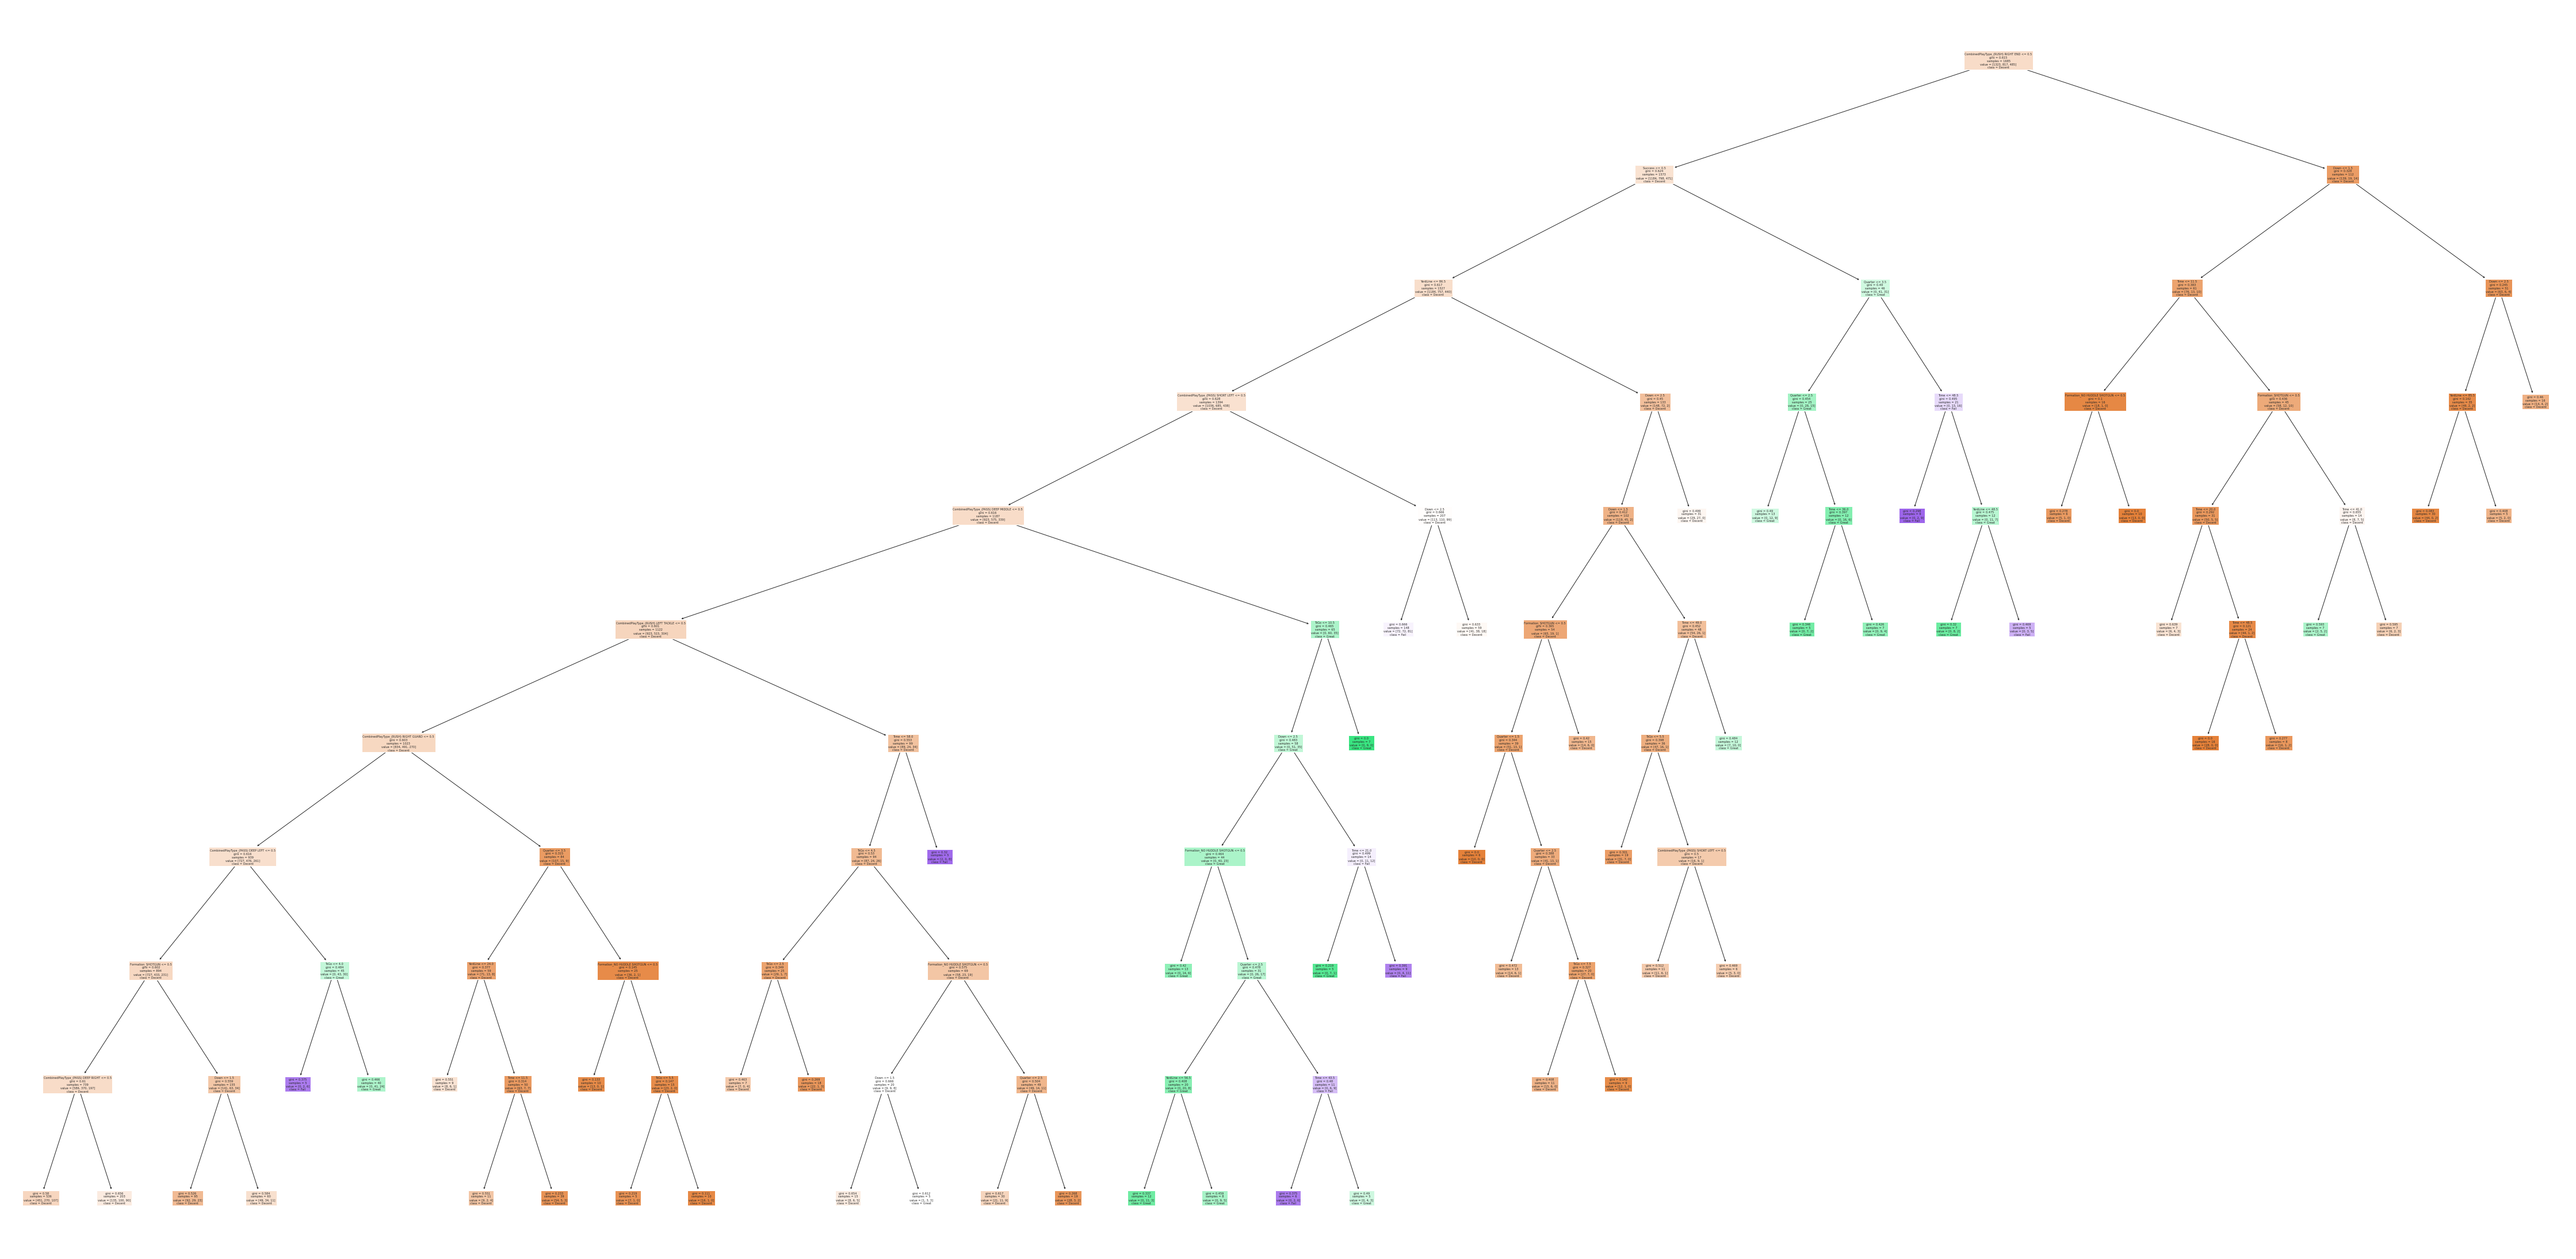

In [45]:
#applying the best parameters from gridsearch
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best_train.estimators_[5], max_depth = 10, feature_names = X.columns,class_names=['Decent', 'Great', 'Fail'],filled=True)

In [46]:
# Finding the importance of features in RandomForest
rf_best_train.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": rf_best_train.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
3,YardLine,0.126094
7,CombinedPlayType_(PASS) DEEP RIGHT,0.124025
4,Time,0.089761
5,CombinedPlayType_(PASS) DEEP LEFT,0.086850
17,CombinedPlayType_(RUSH) RIGHT GUARD,0.078465
2,ToGo,0.065986
6,CombinedPlayType_(PASS) DEEP MIDDLE,0.057185
1,Down,0.052269
14,CombinedPlayType_(RUSH) LEFT GUARD,0.048760
18,CombinedPlayType_(RUSH) RIGHT TACKLE,0.043208


#### Out of all variables,<font color ="red">YardLine, CombinedPlayType_(Pass) DEEP RIGHT & Time </font> are the most important. They have the 3 highest importance scores

## Classification Report of RandomForest Model on Train  & Test Data

Classification Report 	Train Dataset
              precision    recall  f1-score   support

      DECENT       0.58      0.98      0.73      1314
        FAIL       0.66      0.31      0.42       814
       GREAT       0.89      0.03      0.06       497

    accuracy                           0.59      2625
   macro avg       0.71      0.44      0.40      2625
weighted avg       0.66      0.59      0.50      2625



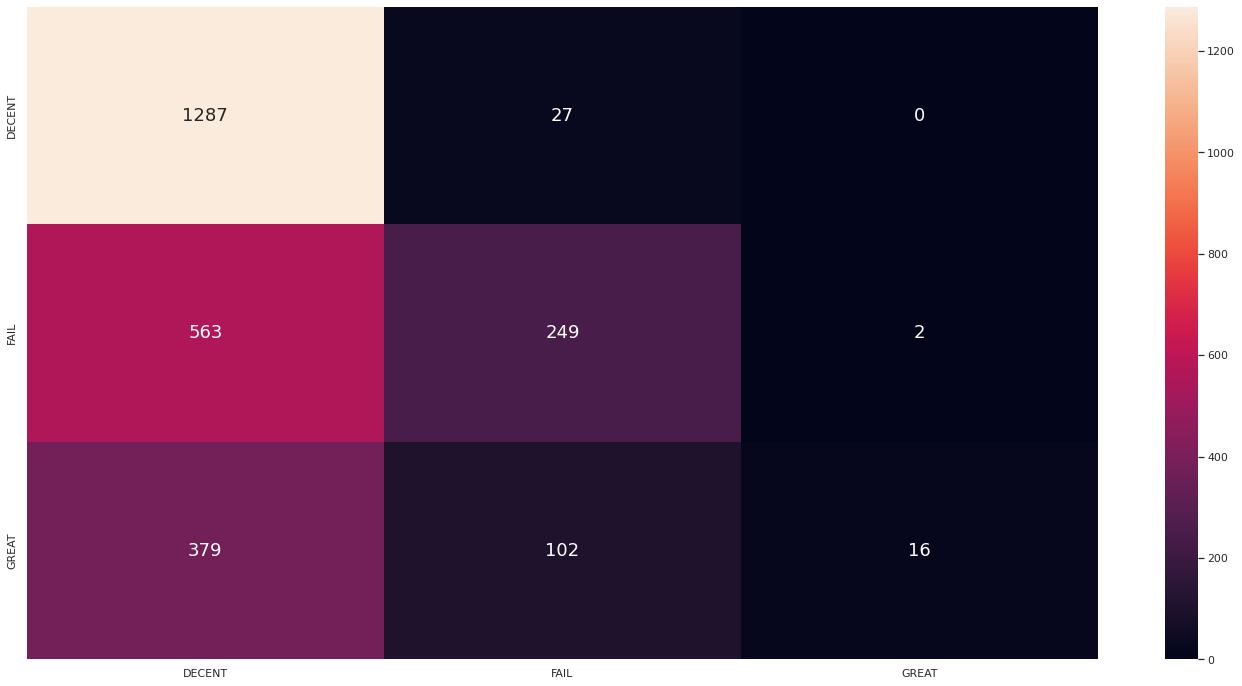

In [47]:
y_train_pred = rf_best_train.predict(X_train)
# confusion matrix for train data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
f, axes = plt.subplots(1,1, figsize=(24, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred), ax = axes,annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=['DECENT','FAIL','GREAT'], yticklabels=['DECENT','FAIL','GREAT'])
print("Classification Report \tTrain Dataset")
print(classification_report(y_train, y_train_pred))

Classification Report 	Test Dataset
              precision    recall  f1-score   support

      DECENT       0.57      0.95      0.71       564
        FAIL       0.58      0.31      0.40       337
       GREAT       0.50      0.01      0.02       224

    accuracy                           0.57      1125
   macro avg       0.55      0.42      0.38      1125
weighted avg       0.56      0.57      0.48      1125



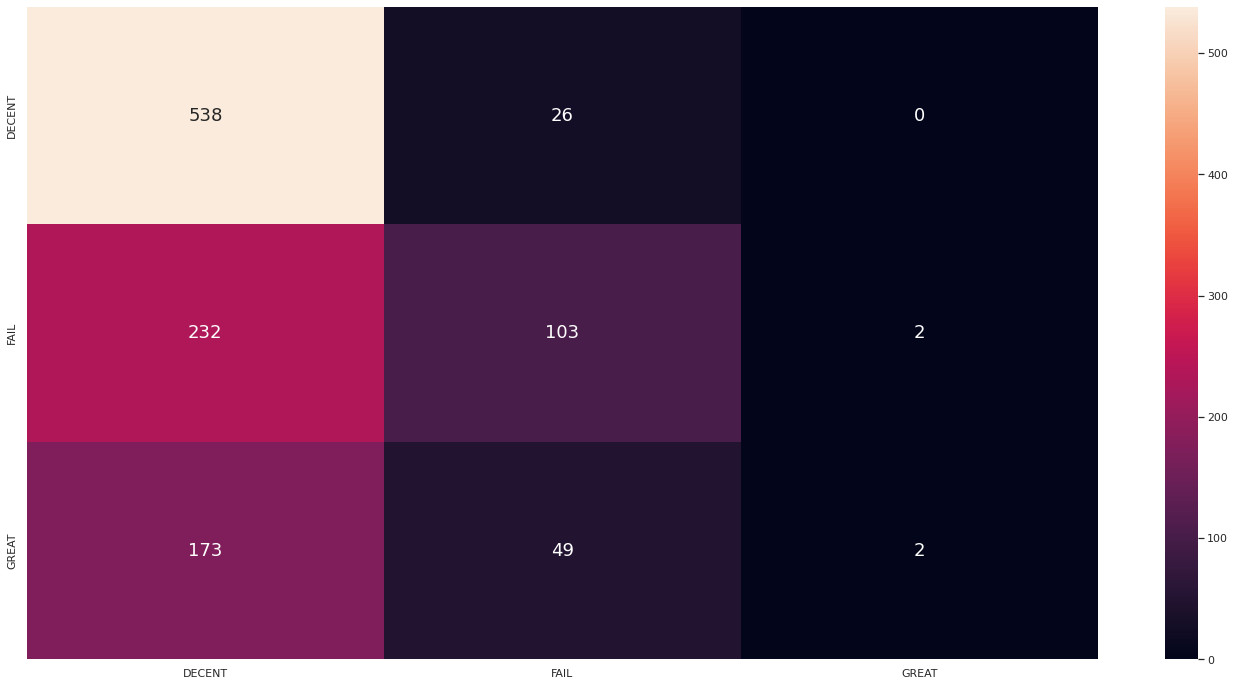

In [48]:
y_test_pred = rf_best_train.predict(X_test)
# confusion matrix for test data, using the trained model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
f, axes = plt.subplots(1,1, figsize=(24, 12))
sb.heatmap(confusion_matrix(y_test, y_test_pred), ax = axes,annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=['DECENT','FAIL','GREAT'], yticklabels=['DECENT','FAIL','GREAT'])
print("Classification Report \tTest Dataset")
print(classification_report(y_test, y_test_pred))

#### The RandomForest model has low precision and recall as the weighted F1 score for both train and test data is low.

### Using TreeIntepreter on RandomForest model
#### We use TreeInterpreter in order to understand how the random forest arrived at the final conclusion and further analyse the most important features for each category of Success (FAIL, DECENT,GREAT)

In [49]:
from treeinterpreter import treeinterpreter as ti

In [50]:
new_X_train = X_train.to_numpy()
preds, bias, contributions = ti.predict(rf_best_train, new_X_train)

In [103]:
import random 
def create_contrbutions_df(contributions, random_sample, feature_names, bias):
    contribs = contributions[random_sample].tolist()
    contribs.insert(0, bias[random_sample])
    contribs = np.array(contribs)
    contrib_df = pd.DataFrame(data=contribs, index=["Base"] + feature_names, columns=["FAIL", "DECENT", "GREAT"])
    prediction = contrib_df[["FAIL", "DECENT", "GREAT"]].sum()
    contrib_df.loc["Prediction"] = prediction
    return contrib_df

In [52]:
#random_sample = random.randint(1, len(X_train))
# print("Selected Sample: %d"%random_sample)
# print("Actual Target Value : %s"%nfl_bal.[y_train[random_sample]])
# print("Predicted Value     : %s"%classifier_rf.target_names[np.argmax(preds[random_sample])])

contrib_df = create_contrbutions_df(contributions, len(X_train)-1, X_train.columns.tolist(),bias)
contrib_df

,FAIL,DECENT,GREAT
Base,0.499006,0.311707,0.189288
Quarter,-0.011811,0.008768,0.003043
Down,-0.001226,-0.005083,0.006309
ToGo,-0.004385,0.006910,-0.002526
YardLine,-0.025368,0.018963,0.006405
Time,-0.010424,0.012588,-0.002164
CombinedPlayType_(PASS) DEEP LEFT,0.008311,-0.005168,-0.003142
CombinedPlayType_(PASS) DEEP MIDDLE,0.005729,-0.002285,-0.003444
CombinedPlayType_(PASS) DEEP RIGHT,0.012042,-0.007710,-0.004332
CombinedPlayType_(PASS) SHORT LEFT,0.004027,-0.001441,-0.002586


#### Plotting a graph to show how each variable affects the final prediction for each category of success by the RandomForest Model. Variables with a higher contribution are more important variables

In [53]:
import plotly.graph_objects as go

def create_waterfall_chart(contrib_df, prediction):
    fig = go.Figure(go.Waterfall(
        name = "Prediction", #orientation = "h", 
        measure = ["relative"] * (len(contrib_df)-1) + ["total"],
        x = contrib_df.index,
        y = contrib_df[prediction],
        #connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
    ))

    fig.update_layout(title = "Prediction : %s"%prediction)

    fig.show()

for i in range(3):
    print("Train Data")
    create_waterfall_chart(contrib_df,contrib_df.columns[i])


Train Data


Train Data


Train Data


#### Conclusions drawn from the graphs
#### 'FAIL': 
Predictions are higher than the base, meaning RandomForest is able to accurately predict Failures

#### 'DECENT' & 'GREAT': 
Most factors have little effect on the final prediction.
YardLine is one of the factors in both categories which have the highest positive difference in value.
However, the final value of prediction is lower than the value of base meaning that RandomForest is unable to accurately categorise between 'DECENT' and 'GREAT' successes.



#### Analyse the RandomForest Model on Test Data using TreeInterpreter

In [54]:
new_X_test = X_test.to_numpy()
preds2, bias2, contributions2 = ti.predict(classifier_rf, new_X_test)
print("Selected Sample: %d"%(len(X_test)-1))
contrib_df_test = create_contrbutions_df(contributions2, len(X_test)-1, X_test.columns.tolist(),bias2)
contrib_df_test

Selected Sample: 1124


,FAIL,DECENT,GREAT
Base,0.499006,0.311707,0.189288
Quarter,0.002216,0.001266,-0.003482
Down,-0.016035,0.011302,0.004732
ToGo,-0.008007,0.008346,-0.000339
YardLine,-0.002418,0.001564,0.000854
Time,0.007337,-0.003886,-0.003451
CombinedPlayType_(PASS) DEEP LEFT,0.010009,-0.005913,-0.004096
CombinedPlayType_(PASS) DEEP MIDDLE,0.006923,-0.002918,-0.004006
CombinedPlayType_(PASS) DEEP RIGHT,0.010669,-0.006426,-0.004242
CombinedPlayType_(PASS) SHORT LEFT,0.002005,-0.001177,-0.000828


In [55]:
for i in range(3):
    print("Test Data")
    create_waterfall_chart(contrib_df_test,contrib_df_test.columns[i])

Test Data


Test Data


Test Data


#### From the graphs, the 3 most important variables for each category are: 
#### 'FAIL': 

Value of prediction higher than the base.

#### 'DECENT'&'GREAT': 

Similar findings to the train data, the value of prediction is lower than the value of base. RandomForest unable to accurately categorise between 'DECENT' and 'GREAT'



# We attempt to upsample the data, since the classes are imbalanced

In [56]:
# 'DECENT' class has the most samples
# we will resample the other two classes to match the number of samples
from sklearn.utils import resample

nfl_balDecent = nfl_bal_ohe[nfl_bal_ohe.Success == 'DECENT']
nfl_balGreat = nfl_bal_ohe[nfl_bal_ohe.Success == 'GREAT']
nfl_balFail = nfl_bal_ohe[nfl_bal_ohe.Success == 'FAIL']

nfl_balGreat_up = resample(nfl_balGreat, 
                        replace=True,
                        n_samples=nfl_balDecent.shape[0])
nfl_balFail_up = resample(nfl_balFail, 
                        replace=True,
                        n_samples=nfl_balDecent.shape[0])
nfl_bal_ohe_up = pd.concat([nfl_balDecent, nfl_balGreat_up, nfl_balFail_up])
nfl_bal_ohe_up['Success'].value_counts()

GREAT     1878
DECENT    1878
FAIL      1878
Name: Success, dtype: int64

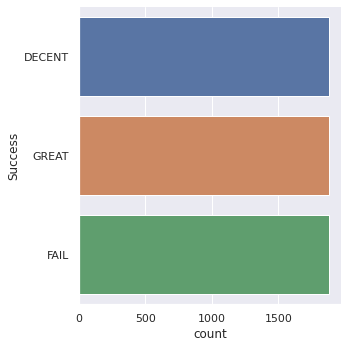

In [57]:
sb.catplot(y = 'Success', data = nfl_bal_ohe_up, kind = "count")

In [58]:
nfl_bal_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 1269
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Quarter                               5634 non-null   int64  
 1   Down                                  5634 non-null   int64  
 2   ToGo                                  5634 non-null   int64  
 3   YardLine                              5634 non-null   int64  
 4   Time                                  5634 non-null   int64  
 5   Success                               5634 non-null   object 
 6   CombinedPlayType_(PASS) DEEP LEFT     5634 non-null   float64
 7   CombinedPlayType_(PASS) DEEP MIDDLE   5634 non-null   float64
 8   CombinedPlayType_(PASS) DEEP RIGHT    5634 non-null   float64
 9   CombinedPlayType_(PASS) SHORT LEFT    5634 non-null   float64
 10  CombinedPlayType_(PASS) SHORT MIDDLE  5634 non-null   float64
 11  CombinedPlayType_

In [59]:
# Try random forest with the upsampled data

y_up = nfl_bal_ohe_up['Success']
X_up = nfl_bal_ohe_up
# Splitting the data into train and test
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up, y_up, train_size=0.7, random_state=42)
# Dropping the response variable from the train and test sets
X_up_train.drop(['Success'], axis=1, inplace=True)
X_up_test.drop(['Success'], axis=1, inplace=True)
X_up_train.shape, X_up_test.shape

((3943, 23), (1691, 23))

In [60]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_up_train, y_up_train)

# checking the oob score, best is slightly less than 1%
print("oob score:", classifier_rf.oob_score_)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'max_features' : [3,5,18,23],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_up_train, y_up_train)
grid_search.best_score_
rf_best_up = grid_search.best_estimator_
rf_best_up

oob score: 0.5163581029672838
Fitting 4 folds for each of 720 candidates, totalling 2880 fits


RandomForestClassifier(max_depth=20, max_features=23, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [61]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 23,
 'min_samples_leaf': 5,
 'n_estimators': 30}

[Text(0.9005781348371681, 0.9761904761904762, 'YardLine <= 86.5\ngini = 0.667\nsamples = 2509\nvalue = [1282, 1334, 1327]\nclass = Great'),
 Text(0.8315592000772665, 0.9285714285714286, 'CombinedPlayType_(PASS) DEEP MIDDLE <= 0.5\ngini = 0.665\nsamples = 2317\nvalue = [1128, 1182, 1318]\nclass = Fail'),
 Text(0.7532282902644231, 0.8809523809523809, 'Success <= 0.5\ngini = 0.666\nsamples = 2174\nvalue = [1128, 1078, 1213]\nclass = Fail'),
 Text(0.6625005365728022, 0.8333333333333334, 'CombinedPlayType_(PASS) SHORT LEFT <= 0.5\ngini = 0.665\nsamples = 2070\nvalue = [1128, 977, 1131]\nclass = Fail'),
 Text(0.5702849559294871, 0.7857142857142857, 'CombinedPlayType_(PASS) DEEP LEFT <= 0.5\ngini = 0.664\nsamples = 1702\nvalue = [1001, 841, 832]\nclass = Decent'),
 Text(0.48562485691391943, 0.7380952380952381, 'CombinedPlayType_(PASS) SHORT RIGHT <= 0.5\ngini = 0.661\nsamples = 1627\nvalue = [1001, 790, 750]\nclass = Decent'),
 Text(0.3942350618131868, 0.6904761904761905, 'CombinedPlayType_(P

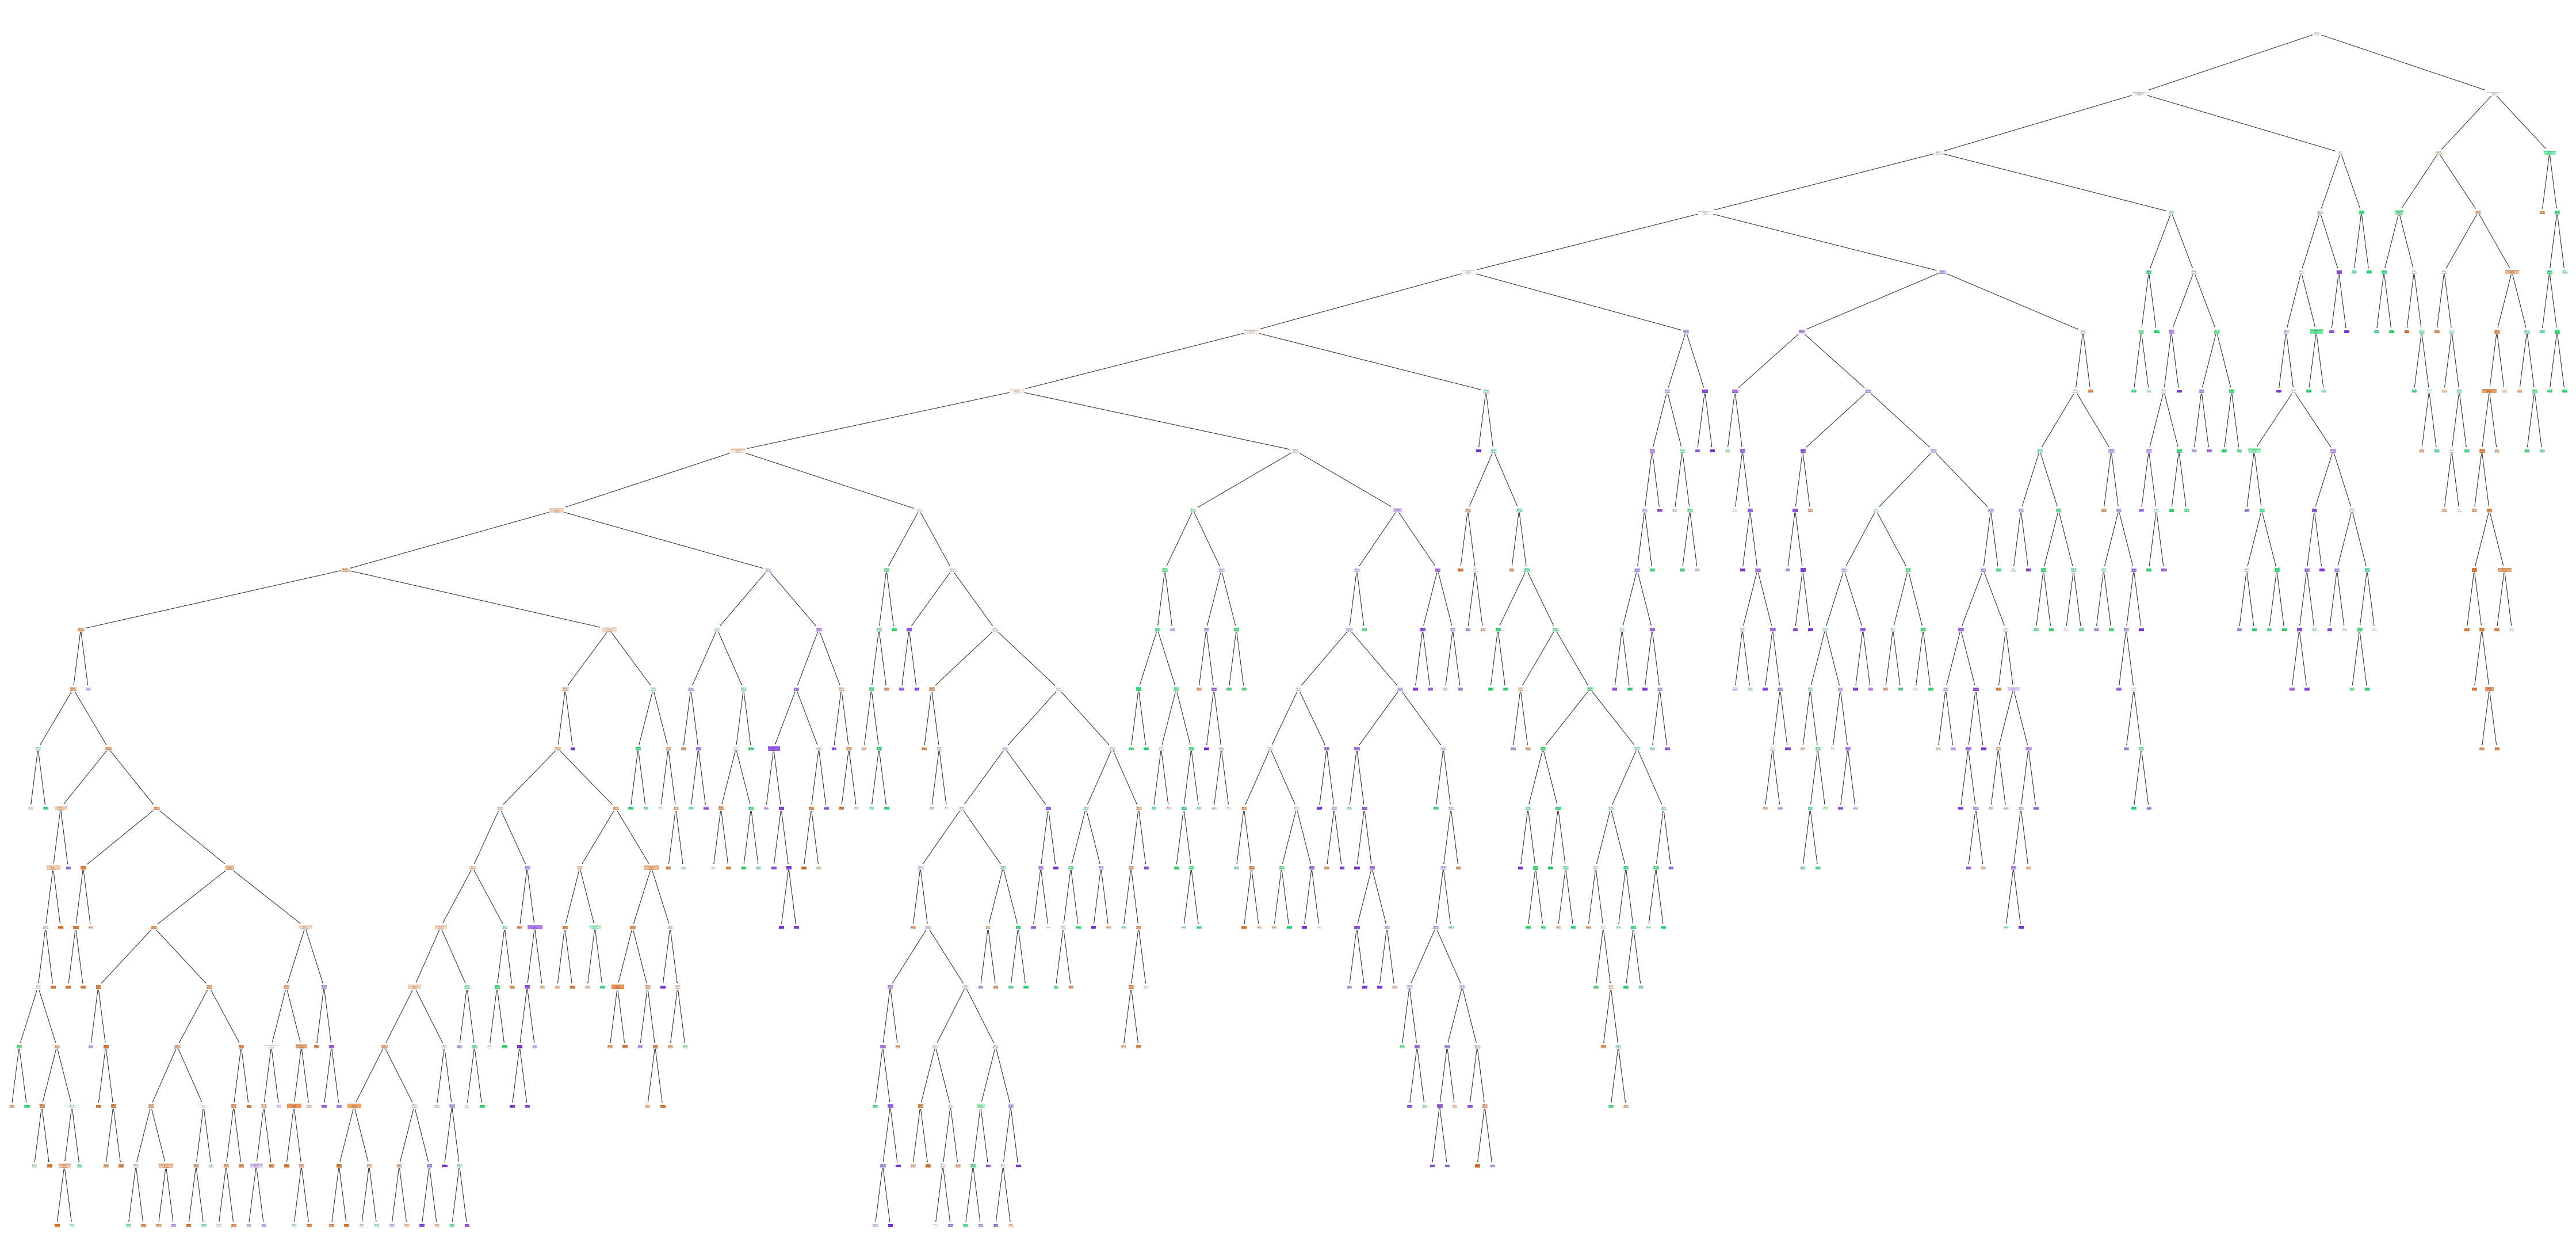

In [62]:
#applying the best parameters from gridsearch
plt.figure(figsize=(80,40))
plot_tree(rf_best_up.estimators_[5], max_depth = 20, feature_names = X.columns,class_names=['Decent', 'Great', 'Fail'],filled=True)

In [63]:
rf_best_up.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_up_train.columns,
    "Importance": rf_best_up.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
3,YardLine,0.311256
4,Time,0.253649
2,ToGo,0.110753
1,Down,0.050185
11,CombinedPlayType_(PASS) Sack,0.026727
7,CombinedPlayType_(PASS) DEEP RIGHT,0.023891
0,Quarter,0.023194
5,CombinedPlayType_(PASS) DEEP LEFT,0.022063
10,CombinedPlayType_(PASS) SHORT RIGHT,0.019542
8,CombinedPlayType_(PASS) SHORT LEFT,0.017302


#### We can see from above that 'YardLine' and 'Time' are still the most important predictors for the response variable. 'ToGo' has shown some significance in this model

## Classification Report of RandomForest Model on Train  & Test Data (Upsampled Data)

Classification Report 	Train Dataset
              precision    recall  f1-score   support

      DECENT       0.82      0.80      0.81      1270
        FAIL       0.87      0.80      0.84      1326
       GREAT       0.82      0.91      0.87      1347

    accuracy                           0.84      3943
   macro avg       0.84      0.84      0.84      3943
weighted avg       0.84      0.84      0.84      3943



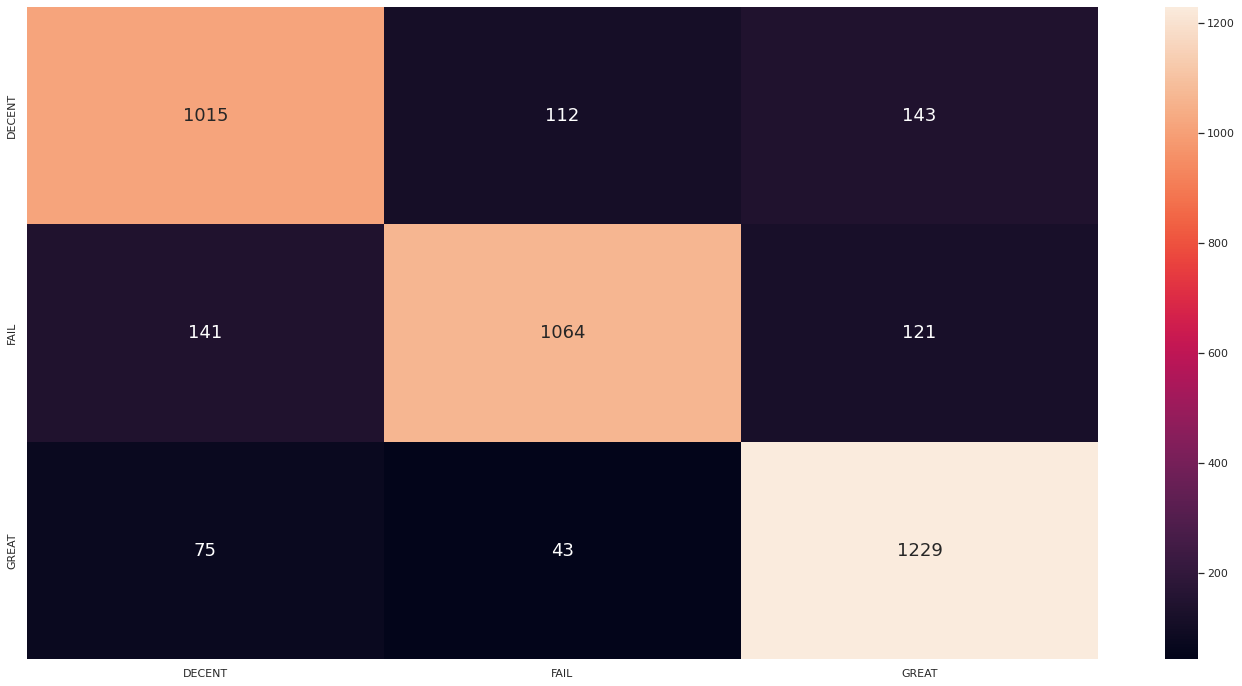

In [64]:
# confusion matrix for upsampled train data
y_up_train_pred = rf_best_up.predict(X_up_train)
f, axes = plt.subplots(1,1, figsize=(24, 12))
sb.heatmap(confusion_matrix(y_up_train, y_up_train_pred), ax = axes,annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=['DECENT','FAIL','GREAT'], yticklabels=['DECENT','FAIL','GREAT'])
print("Classification Report \tTrain Dataset")
print(classification_report(y_up_train, y_up_train_pred))

#### F1 score of the model has significantly improved with the balancing of the classes

Classification Report 	Test Dataset
              precision    recall  f1-score   support

      DECENT       0.69      0.64      0.66       608
        FAIL       0.71      0.64      0.67       552
       GREAT       0.67      0.79      0.72       531

    accuracy                           0.68      1691
   macro avg       0.69      0.69      0.68      1691
weighted avg       0.69      0.68      0.68      1691



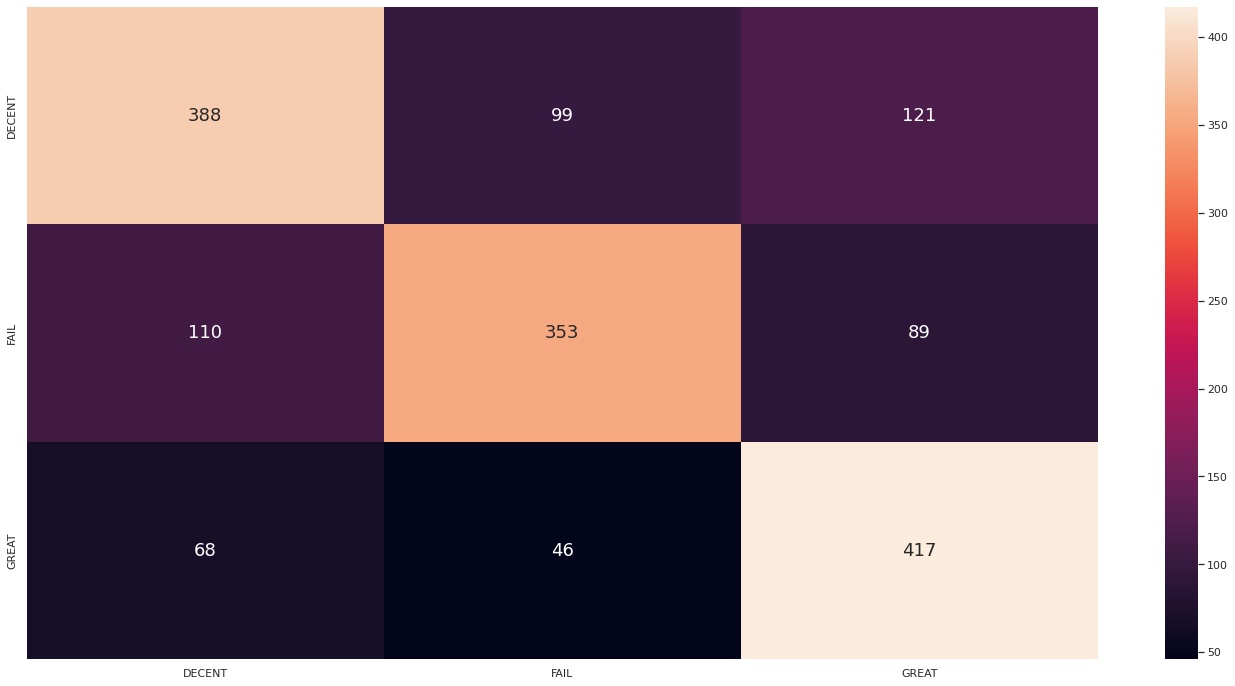

In [65]:
y_up_test_pred = rf_best_up.predict(X_up_test)
# confusion matrix for test data, using the trained model for upsampled data
f, axes = plt.subplots(1,1, figsize=(24, 12))
sb.heatmap(confusion_matrix(y_up_test, y_up_test_pred), ax = axes,annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=['DECENT','FAIL','GREAT'], yticklabels=['DECENT','FAIL','GREAT'])
print("Classification Report \tTest Dataset")
print(classification_report(y_up_test, y_up_test_pred))

#### Unfortunately, it does not work very well on the test data, with a significantly lower F1 score as compared to its score on the train set. Nevertheless, the F1 score has significantly improved from the original dataset

### Using TreeInterpreter on RandomForest model (Upsampled Data)
#### For the train Data

In [104]:
#for the upscaled data
new_X_up_train = X_up_train.to_numpy()
preds_up, bias_up, contributions_up = ti.predict(rf_best_up, new_X_up_train)

contrib_df_up = create_contrbutions_df(contributions_up, len(X_up_train)-1, X_up_train.columns.tolist(), bias_up)
contrib_df_up

for i in range(3):
    print("Train Data")
    create_waterfall_chart(contrib_df_up,contrib_df_up.columns[i])

Train Data


Train Data


Train Data


#### Tree Interpreter for the test Data

In [105]:
#for the upscaled data
new_X_up_test = X_up_test.to_numpy()
preds_up2, bias_up2, contributions_up2 = ti.predict(rf_best_up, new_X_up_test)

contrib_df_up2 = create_contrbutions_df(contributions_up2, len(X_up_test)-1, X_up_test.columns.tolist(), bias_up2)
contrib_df_up2

for i in range(3):
    print("Test Data")
    create_waterfall_chart(contrib_df_up2,contrib_df_up2.columns[i])

Test Data


Test Data


Test Data


#### Results from the upsampled data are similar to the original data.

#### With the upsampled data, RandomForest is better able to predict 'GREAT' successes now but still performs poorly on predicting 'DECENT' success

## XGBoost on train and test data

#### To further test the reliability and consistency of our results, we applied a gradient boosting model, XGBoost

#### Replacing the categorical with numerical values for train and test before XGBoost

In [106]:
new_y_train = y_train
new_y_train.replace(to_replace='FAIL', value=0, inplace=True)
new_y_train.replace(to_replace='DECENT', value=1, inplace=True)
new_y_train.replace(to_replace='GREAT', value=2, inplace=True)
display(new_y_train)

3603    0
1237    0
2080    1
2566    2
887     0
       ..
1130    0
1294    1
860     0
3507    1
3174    1
Name: Success, Length: 2625, dtype: int64

In [107]:
new_y_test = y_test
new_y_test.replace(to_replace='FAIL', value=0, inplace=True)
new_y_test.replace(to_replace='DECENT', value=1, inplace=True)
new_y_test.replace(to_replace='GREAT', value=2, inplace=True)
display(new_y_test)

2148    0
1044    1
3318    0
439     2
3515    1
       ..
1459    0
1789    2
3662    0
1151    2
942     1
Name: Success, Length: 1125, dtype: int64

In [108]:
import xgboost as xgb

xgboost_train = xgb.DMatrix(X_train, label=new_y_train, enable_categorical=True)
xgboost_test = xgb.DMatrix(X_test, label=new_y_test, enable_categorical=True)

In [109]:
# Training data with XGBoost
param = {
    "eta": 0.01,
    "objective": "multi:softmax",
    "subsample": 0.5,
    "base_score": np.mean(new_y_train),
    "eval_metric": "mlogloss",
    "num_class": 3
}
model = xgb.train(param, xgboost_train, 5000, evals = [(xgboost_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-mlogloss:1.09630
[100]	test-mlogloss:0.96352
[200]	test-mlogloss:0.92556
[300]	test-mlogloss:0.91142
[400]	test-mlogloss:0.90716
[421]	test-mlogloss:0.90747


### Feature Importance that comes with XGBoost
##### Might not be that consistent, will attempt to use SHAP that comes with consistency guarantees later (to order the features correctly)

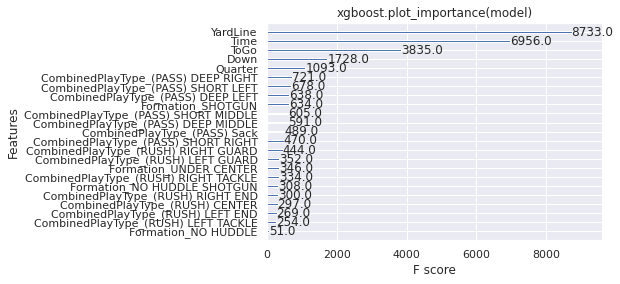

In [110]:
xgb.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [111]:
#Accuracy Score of XGBoost
from sklearn.metrics import accuracy_score
xgb_y_pred = model.predict(xgboost_test)
predictions = [round(value) for value in xgb_y_pred]
accuracy = accuracy_score(new_y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.73%


#### Replacing the categorical values before using SHAP explainer

In [112]:
xgb_nfl_bal = nfl_bal_ohe
xgb_nfl_bal.replace(to_replace='FAIL', value=0, inplace=True)
xgb_nfl_bal.replace(to_replace='DECENT', value=1, inplace=True)
xgb_nfl_bal.replace(to_replace='GREAT', value=2, inplace=True)
xgb_nfl_bal.drop(['Success'], axis=1, inplace=True)
xgb_nfl_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Quarter                               3750 non-null   int64  
 1   Down                                  3750 non-null   int64  
 2   ToGo                                  3750 non-null   int64  
 3   YardLine                              3750 non-null   int64  
 4   Time                                  3750 non-null   int64  
 5   CombinedPlayType_(PASS) DEEP LEFT     3750 non-null   float64
 6   CombinedPlayType_(PASS) DEEP MIDDLE   3750 non-null   float64
 7   CombinedPlayType_(PASS) DEEP RIGHT    3750 non-null   float64
 8   CombinedPlayType_(PASS) SHORT LEFT    3750 non-null   float64
 9   CombinedPlayType_(PASS) SHORT MIDDLE  3750 non-null   float64
 10  CombinedPlayType_(PASS) SHORT RIGHT   3750 non-null   float64
 11  CombinedPlayType_

In [113]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xgb_nfl_bal)

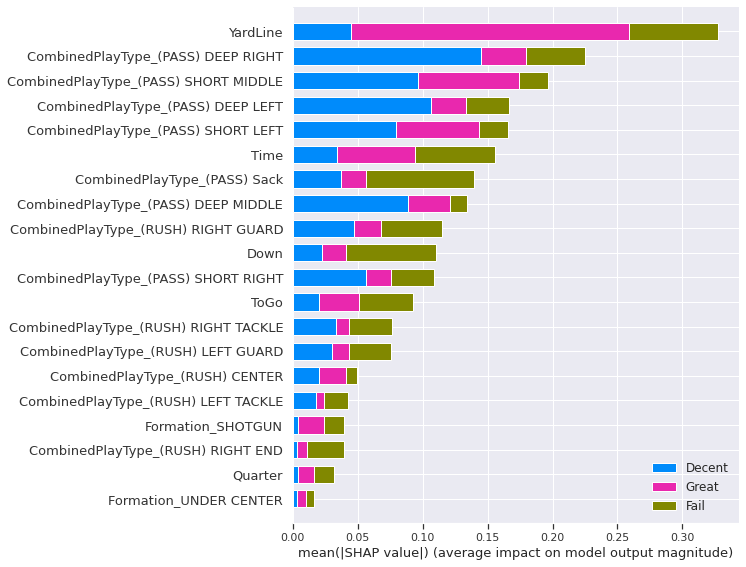

In [114]:
#Summary plot of 3 classes together (FAIL, DECENT, GREAT)
shap.summary_plot(shap_values, xgb_nfl_bal.columns.tolist(), show = True, class_names = ['Fail', 'Decent', 'Great'], plot_type="bar")


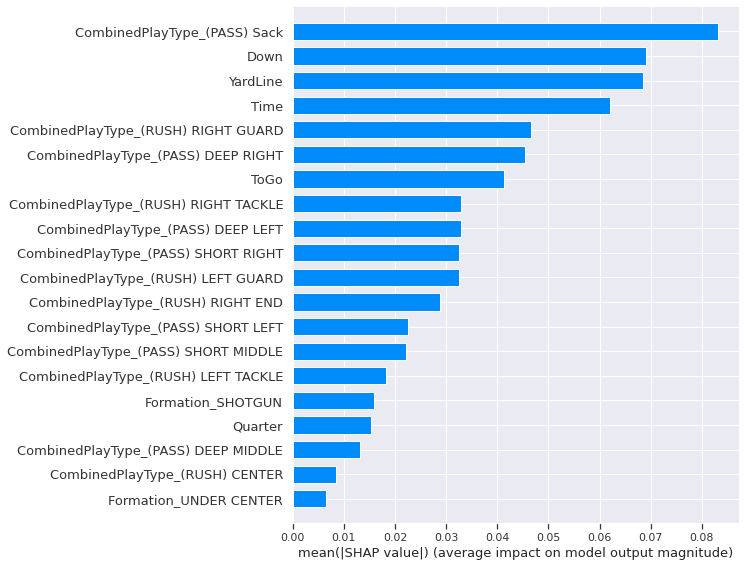

In [115]:
shap.summary_plot(shap_values[0], xgb_nfl_bal.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'FAIL'

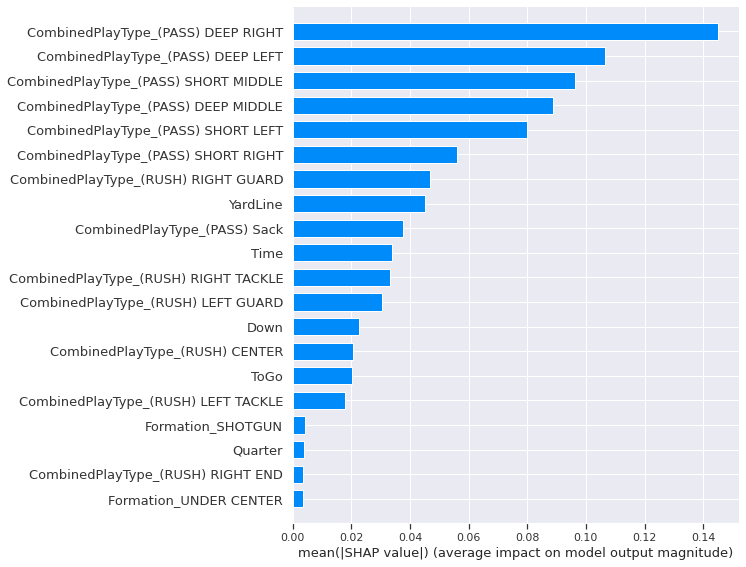

In [116]:
shap.summary_plot(shap_values[1], xgb_nfl_bal.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'Decent'

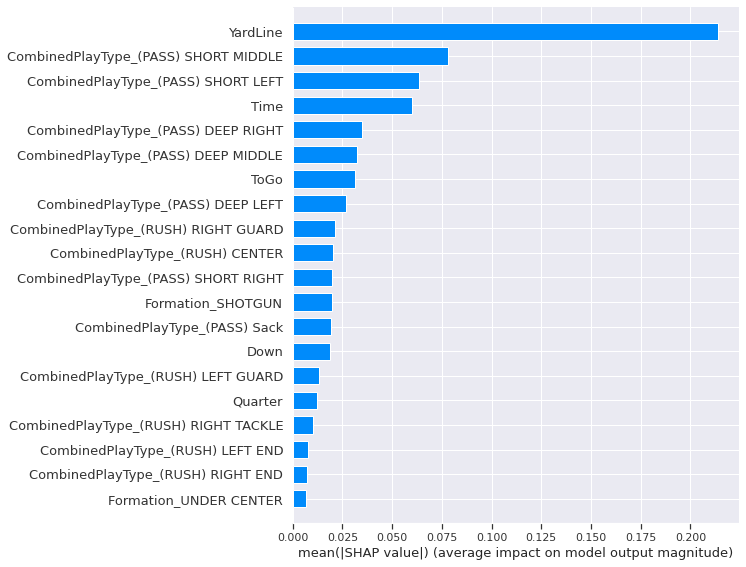

In [117]:
shap.summary_plot(shap_values[2], xgb_nfl_bal.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'Great'

### Applying XGBoost and SHAP representation (Upsampled Data)

In [118]:
new_y_up_train = y_up_train
new_y_up_train.replace(to_replace='FAIL', value=0, inplace=True)
new_y_up_train.replace(to_replace='DECENT', value=1, inplace=True)
new_y_up_train.replace(to_replace='GREAT', value=2, inplace=True)
display(new_y_up_train)

1279    1
347     1
1276    0
494     2
1264    0
       ..
3526    0
3696    0
85      0
2149    0
1635    1
Name: Success, Length: 3943, dtype: int64

In [119]:
new_y_up_test = y_up_test
new_y_up_test.replace(to_replace='FAIL', value=0, inplace=True)
new_y_up_test.replace(to_replace='DECENT', value=1, inplace=True)
new_y_up_test.replace(to_replace='GREAT', value=2, inplace=True)
display(new_y_up_test)

778     2
1737    1
80      2
1475    1
185     1
       ..
3528    2
1067    1
3449    1
3018    1
2559    0
Name: Success, Length: 1691, dtype: int64

In [120]:
xgboost_up_train = xgb.DMatrix(X_up_train, label=new_y_up_train, enable_categorical=True)
xgboost_up_test = xgb.DMatrix(X_up_test, label=new_y_up_test, enable_categorical=True)

In [125]:
param = {
    "eta": 0.01,
    "objective": "multi:softmax",
    "subsample": 0.5,
    "base_score": np.mean(new_y_up_train),
    "eval_metric": "mlogloss",
    "num_class": 3
}
up_model = xgb.train(param, xgboost_up_train, 5000, evals = [(xgboost_up_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-mlogloss:1.09707
[100]	test-mlogloss:0.99659
[200]	test-mlogloss:0.94565
[300]	test-mlogloss:0.91299
[400]	test-mlogloss:0.88746
[500]	test-mlogloss:0.86800
[600]	test-mlogloss:0.85020
[700]	test-mlogloss:0.83446
[800]	test-mlogloss:0.82024
[900]	test-mlogloss:0.80661
[1000]	test-mlogloss:0.79508
[1100]	test-mlogloss:0.78369
[1200]	test-mlogloss:0.77396
[1300]	test-mlogloss:0.76501
[1400]	test-mlogloss:0.75619
[1500]	test-mlogloss:0.74836
[1600]	test-mlogloss:0.74059
[1700]	test-mlogloss:0.73367
[1800]	test-mlogloss:0.72760
[1900]	test-mlogloss:0.72176
[2000]	test-mlogloss:0.71620
[2100]	test-mlogloss:0.71078
[2200]	test-mlogloss:0.70594
[2300]	test-mlogloss:0.70126
[2400]	test-mlogloss:0.69687
[2500]	test-mlogloss:0.69340
[2600]	test-mlogloss:0.68955
[2700]	test-mlogloss:0.68648
[2800]	test-mlogloss:0.68255
[2900]	test-mlogloss:0.67944
[3000]	test-mlogloss:0.67634
[3100]	test-mlogloss:0.67379
[3200]	test-mlogloss:0.67092
[3300]	test-mlogloss:0.66904
[3400]	test-mlogloss:0.666

In [126]:
xgb_y_up_test_pred = up_model.predict(xgboost_up_test)
predictions = [round(value) for value in xgb_y_up_test_pred]
accuracy = accuracy_score(new_y_up_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.46%


#### Accuracy has improved

In [128]:
xgb_nfl_bal_up = nfl_bal_ohe_up
xgb_nfl_bal_up.replace(to_replace='FAIL', value=0, inplace=True)
xgb_nfl_bal_up.replace(to_replace='DECENT', value=1, inplace=True)
xgb_nfl_bal_up.replace(to_replace='GREAT', value=2, inplace=True)
xgb_nfl_bal_up.drop(['Success'], axis=1, inplace=True)
xgb_nfl_bal_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 1269
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Quarter                               5634 non-null   int64  
 1   Down                                  5634 non-null   int64  
 2   ToGo                                  5634 non-null   int64  
 3   YardLine                              5634 non-null   int64  
 4   Time                                  5634 non-null   int64  
 5   CombinedPlayType_(PASS) DEEP LEFT     5634 non-null   float64
 6   CombinedPlayType_(PASS) DEEP MIDDLE   5634 non-null   float64
 7   CombinedPlayType_(PASS) DEEP RIGHT    5634 non-null   float64
 8   CombinedPlayType_(PASS) SHORT LEFT    5634 non-null   float64
 9   CombinedPlayType_(PASS) SHORT MIDDLE  5634 non-null   float64
 10  CombinedPlayType_(PASS) SHORT RIGHT   5634 non-null   float64
 11  CombinedPlayType_

In [129]:
import shap
explainer = shap.TreeExplainer(up_model)
shap_values_up = explainer.shap_values(xgb_nfl_bal_up)

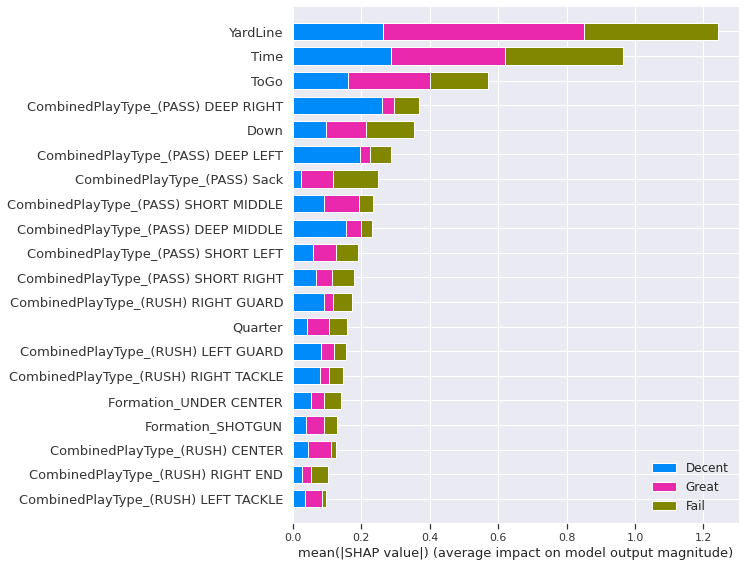

In [130]:
shap.summary_plot(shap_values_up, xgb_nfl_bal_up.columns.tolist(), show = True, plot_type="bar", class_names = ['Fail', 'Decent', 'Great'])

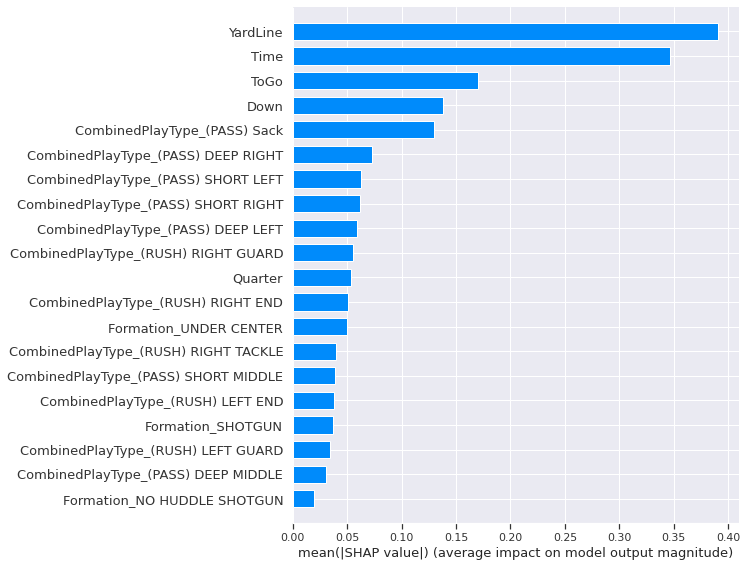

In [131]:
shap.summary_plot(shap_values_up[0], xgb_nfl_bal_up.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'Fail'

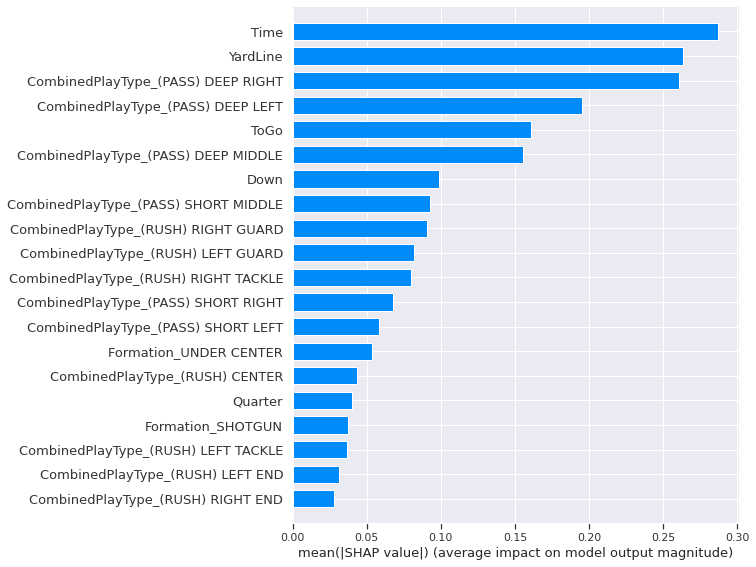

In [132]:
shap.summary_plot(shap_values_up[1], xgb_nfl_bal_up.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'Decent'

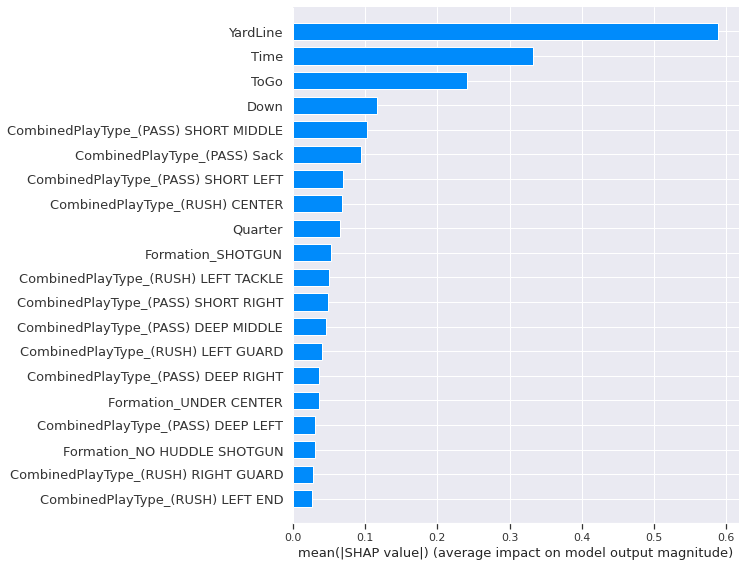

In [133]:
shap.summary_plot(shap_values_up[2], xgb_nfl_bal_up.columns.tolist(), show = True, plot_type="bar")
# Summary Plot where class = 'Great'

#### Although each category of success has variables which have significantly higher SHAP values than the rest, overall the variables have low SHAP values indicating that they do not have a large impact on the final outcome of success

## Conclusion
#### Comparing between the 2 models(RandomForest & XGboost), <font color = 'red'>XGboost with upsampled data</font> performs better as it has the higher accuracy 

#### Certain variables (Time, YardLine, ToGo) stand out as being important across all 3 categories and this aligns with existing game knowledge. However, they have low SHAP values and will have a small impact on the final outcome of the success of the play.

#### In conclusion, we were <font color = 'red'>able to identify important variables</font> affecting the outcome of a play but more needs to be done to look into their usefulness in being a deciding factor for coaches.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0d9143c-5622-4bb8-98ed-69bfa11afbde' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>